# MSB1015 Scientific programming
## Heart failure prediction model


During this project the goal is predicting heart failure in the Kaggle challenge heart failure prediction. The database contains 12 clinical features and 1 target. The features constitute several different data types forms integer numbers, percentages, and binarized data. The script is divided into two sections Pre-processing/initial data exploration, and classification. the packages that are needed are loaded in for each section. these sections are intendced to run consecutively.


### Pre-Processing/ initial data exploration
The first step was loading in the data and a preliminary exploration.

In [1]:
## Data and module loading
# input: Tom_data.xlsx(external data file)
# output: df


# Importing neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #for this document to work needs to be seaborn 0.11 or higher

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import plotly
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


from sklearn.ensemble import IsolationForest


# Loading in the heart failure data
df = pd.read_excel (r'Tom_data.xlsx')


# Preliminary data exploration
print(df.dtypes)
print(list(df.columns))
print(df.head())

age                         float64
anaemia                       int64
creatinine_phosphokinase    float64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                     582.0         0               20.0   
1  55.0        0                    7861.0         0               38.0   
2  65.0        0                     146.0         0               20.0   
3  50.0        1         

The data consists of 13 columns; Age, Anaemia, Creatine_phosphokinase, Diabetes, Ejection_fraction, High_blood_pressure, Platelets, Serum_creatine, Serum_sodium, Sex, smoking, Time, and Death event. The original publication and meta data from the challenge provider was used, in order to better grasp how these columns were obtained. Below a list containing both a description of how these parameters were obtained and the datatype they have are displayed.

1. Age
    - Age of the patient measured in years
    - interger data type
2. anaemia
    - Decrease of hemoglobin in the patient reported as status (0:False, 1:True)
    - binary data type
3. creatine phosphokinase
    - level of creatine phosphokinase in serum measured in mcg/L
    - integer data type
4. diabetes
    - Diabtetic status of the patient (0:False,1:True)
    - binary data type
5. ejection fraction
    - Percentage of blood leaving the heart on each contraction
    - fraction data type
6. high blood pressure
    - hypertension status of the patient (0:False,1:True)
    - binary datatype
7. platelets
    - Platelets in the blood measured in platelets/ml
    - integer datatype
8. serum creatine
    - creatine level in serum measured in mg/dL
    - integer datatype
9. serum sodium
    - sodium level in serum measured in mEq/l
    - integer datatype
10. sex
    - sex of the patient expressed as a binary (1:male,0:female)
    - binary datatype
11. smoking
    - smoking status of the patient (0:False,1:True)
    - binary datatype
12. time
    - follow up period till death (if death event is 1) or last contact (if death event is 0) measured in days
    - integer datatype
13. death event
    - death status during follow up period (0:False,1:True)
    - binary datatype
    
Further manual exploration of the data showed 3 logical discrepancies. The first was that in the age column several ages were expressed with decimal numbers. To correct for this the entire column was converted to integer data. The ejection fraction column has one negative value and an impossible high value which were both replaced with nan for future imputation. The same was done for the serum sodium variable which also had an impossible high variable.  

In [2]:
## changing logical inconsistencies in the dataframe
# input: df
# output: df

# convert the decimal numbers to interger numbers for the age column
df["age"] = df["age"].apply(np.int64)


#   ejection fraction has a negative value (-5) and a impossible high value (3.5e+06), these values are replaced with nan
df = df.replace(-5, np.nan)
df = df.replace(3.5e+06,np.nan)


#   serum_sodium has a impossible high value (2e+09), this is replaced with nan, there is also a 1 which is highly unlikely.
df = df.replace(2e+09,np.nan)
df["serum_sodium"] = df["serum_sodium"].replace(1,np.nan)

Visualization was done to further explore The variables. The data was converted, for this step, into seperate dataframes, in order to get the correct visualization per data type. 

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


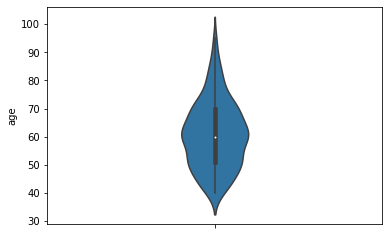

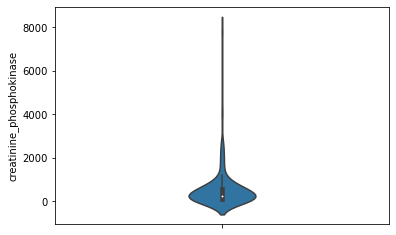

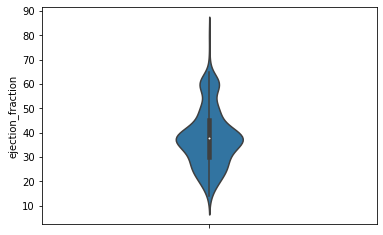

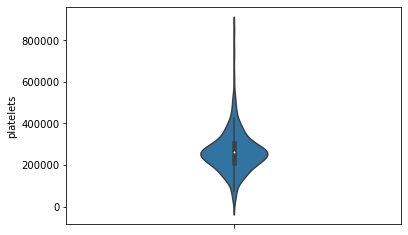

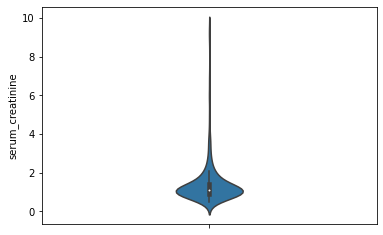

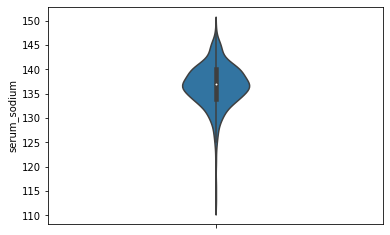

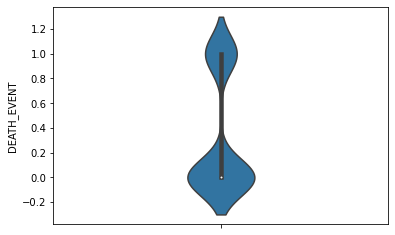

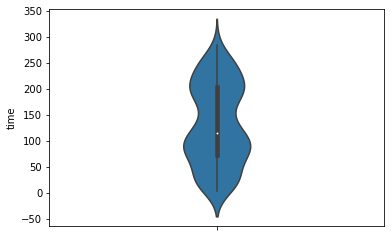

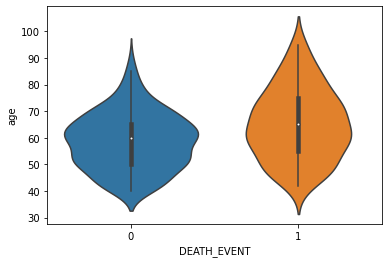

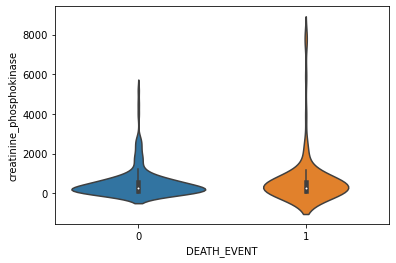

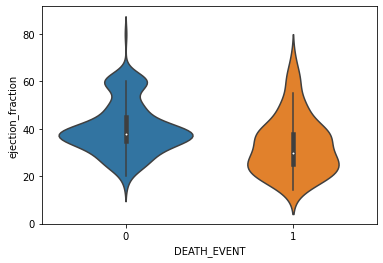

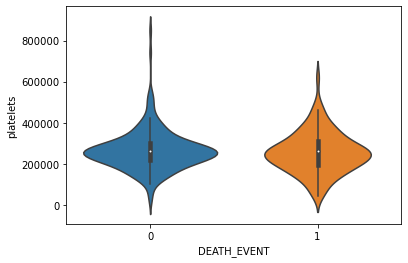

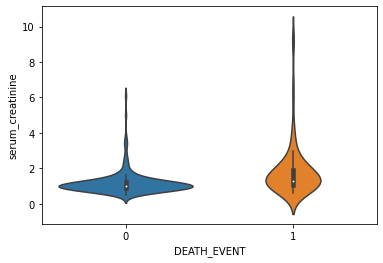

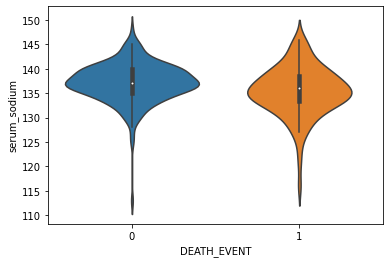

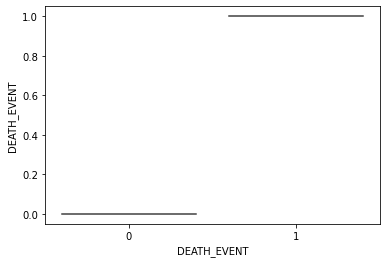

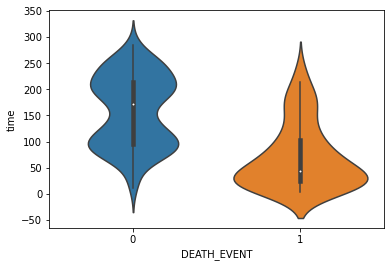

<Figure size 432x288 with 0 Axes>

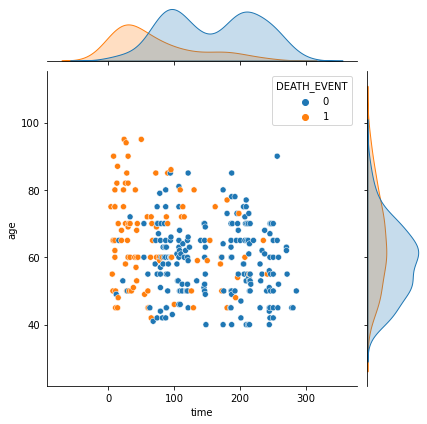

<Figure size 432x288 with 0 Axes>

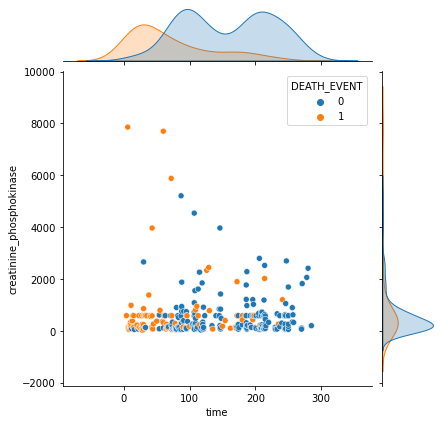

<Figure size 432x288 with 0 Axes>

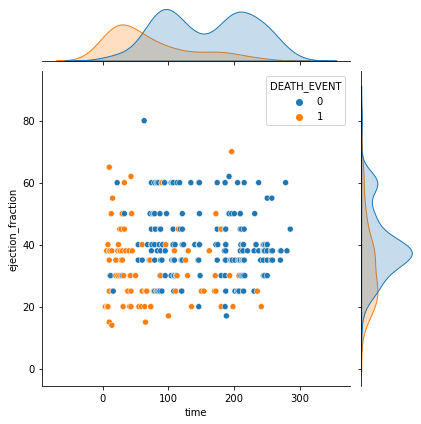

<Figure size 432x288 with 0 Axes>

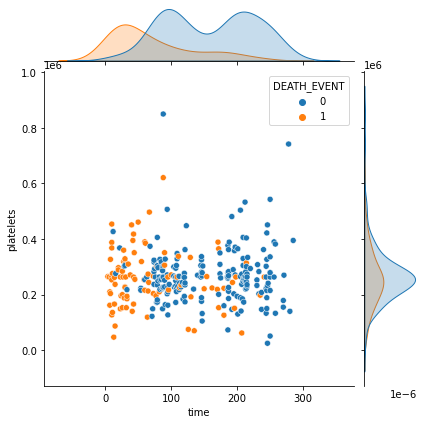

<Figure size 432x288 with 0 Axes>

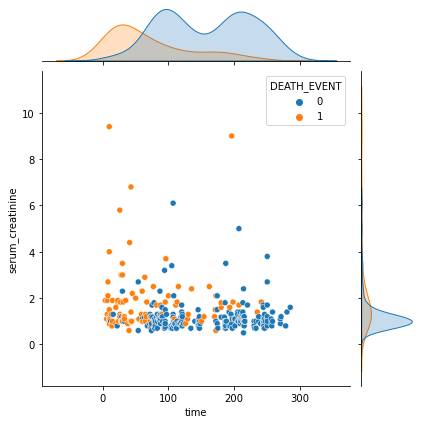

<Figure size 432x288 with 0 Axes>

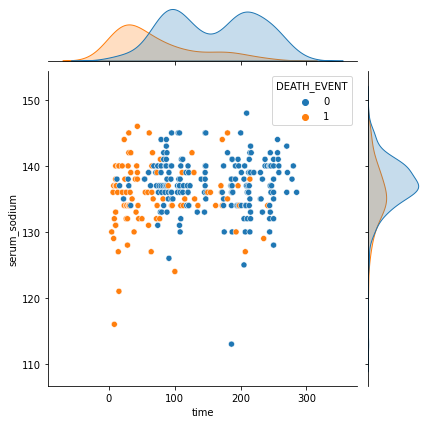

<Figure size 432x288 with 0 Axes>

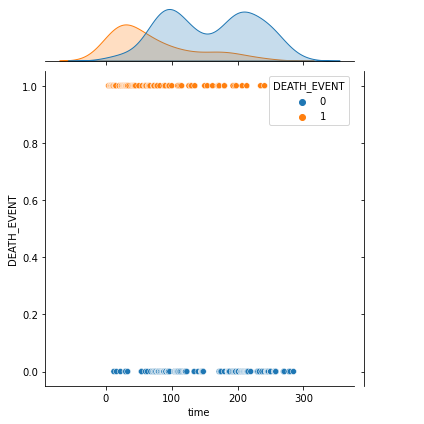

<Figure size 432x288 with 0 Axes>

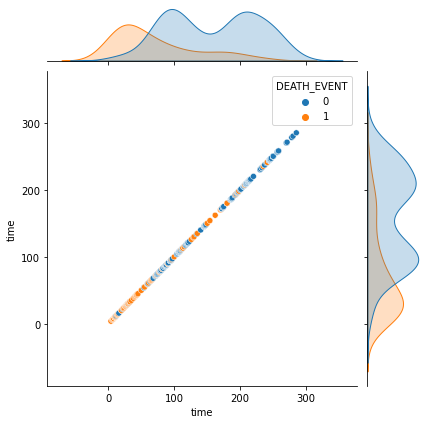

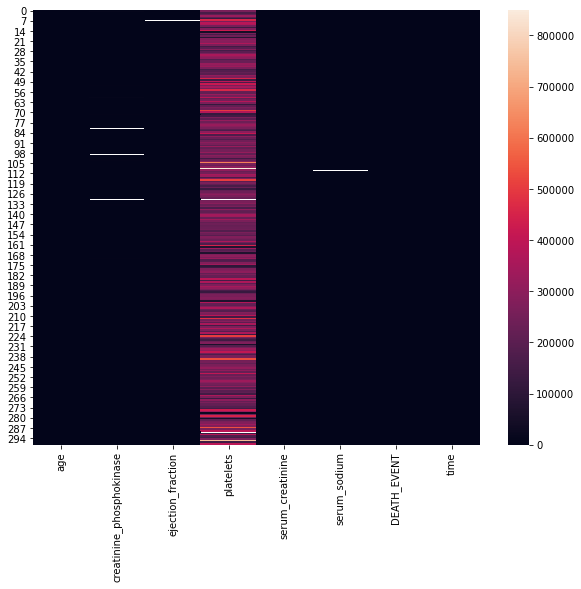

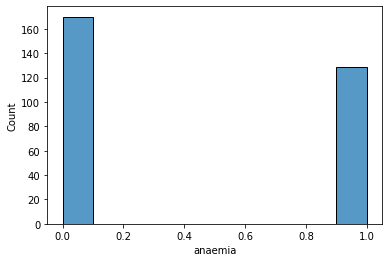

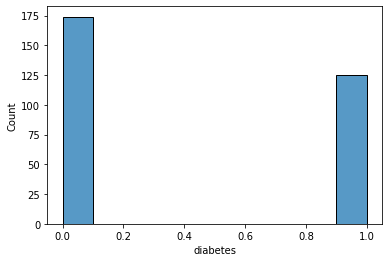

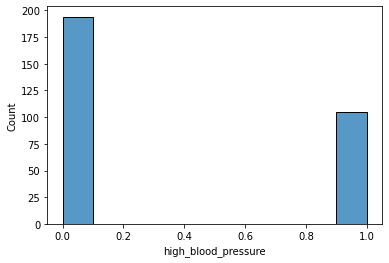

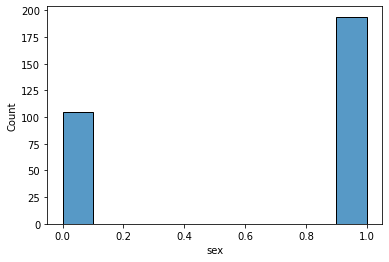

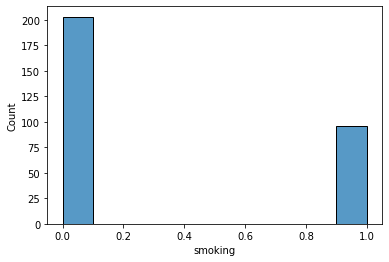

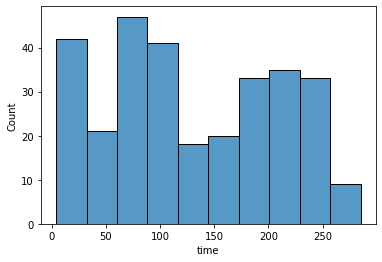

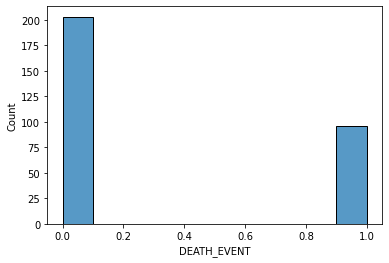

In [3]:
## pre-preprocess data exploration
# input: df
# output: df_binary (containing only binary variables, time, and death_event)
#         df_interger_fraction (Containing only interger, fractional, time, and death event)


# seperating the different data types into sub-data frames for the visualization
df_binary = df[['anaemia',
                'diabetes',
                'high_blood_pressure',
                'sex',
                'smoking',
                'time',
                'DEATH_EVENT']]

df_interger_fraction = df[['age',
                           'creatinine_phosphokinase',
                           'ejection_fraction',
                           'platelets',
                           'serum_creatinine',
                           'serum_sodium',
                           'DEATH_EVENT',
                           'time']]


# to not get memory warnings about the amount of plots
plt.rcParams.update({'figure.max_open_warning': 0})


# violin plot per variable, violin plot death per variable, and joint plot for the interger variable type
for column in df_interger_fraction :
    plt.figure()
    sns.violinplot(y=df_interger_fraction[column],width= 0.2)
  
for column in df_interger_fraction :
    plt.figure()
    sns.violinplot(x=df_interger_fraction ['DEATH_EVENT'], y=df_interger_fraction[column])
    
for column in df_interger_fraction :
    plt.figure()
    sns.jointplot(data=df_interger_fraction, x="time", y=column, hue="DEATH_EVENT")

    
# heatmap of the continouse data
plt.figure(figsize=(10,8))
sns.heatmap(df_interger_fraction)


# histogram plots for the binary 
for column in df_binary :
    plt.figure()
    sns.histplot(data=df_binary, x=column)
 

Due to the different data types normalization will not be performed, scaling will be performed. Scaling will be done using a min max scaler (0 to 1). this was done to get the contious data into the same number space as the binary data. The thinking here was that it would enable to a certain extent the use of distance based methods. Also due to the different upper and lower limit of the the different variables it was decided that peserving the distribution was more important than the min and max values of the variables

MinMaxScaler()


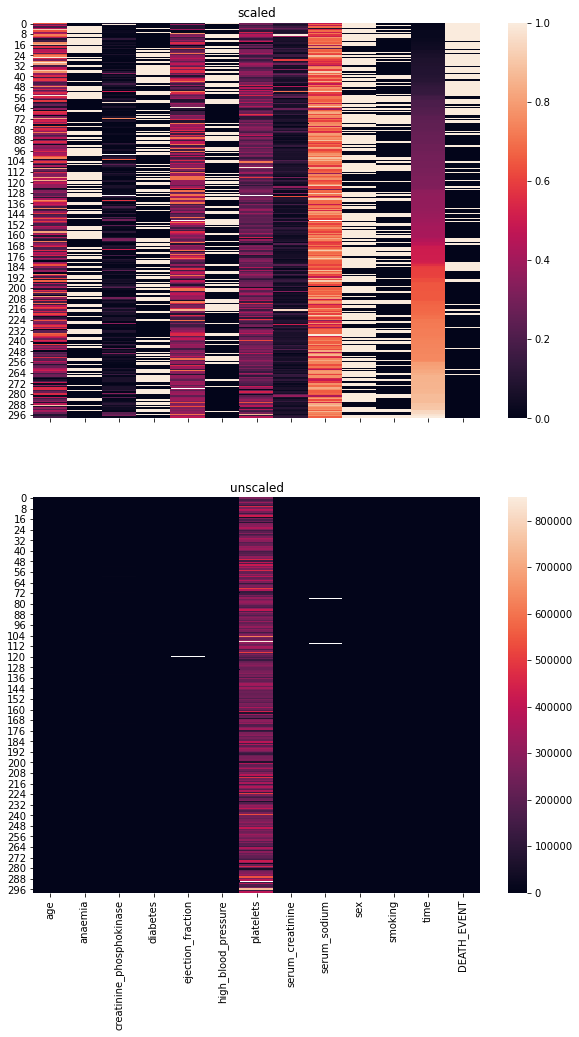

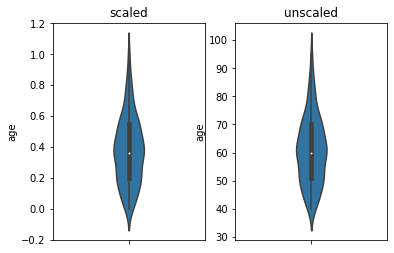

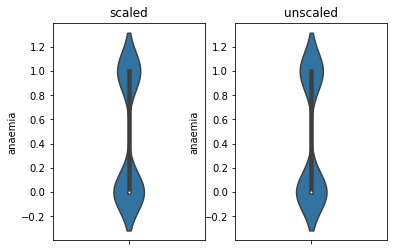

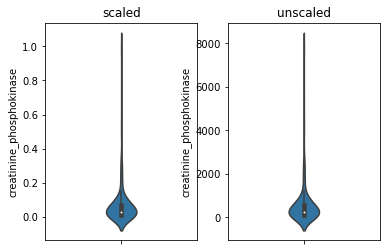

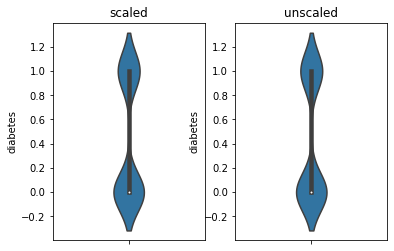

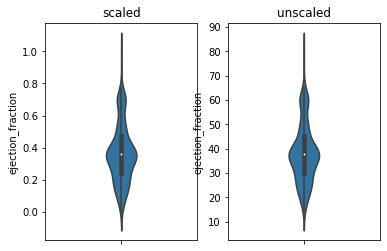

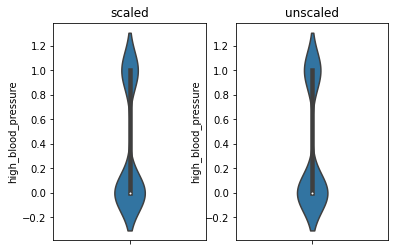

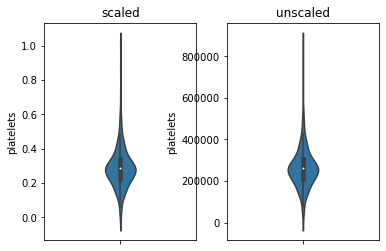

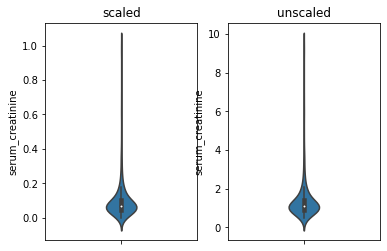

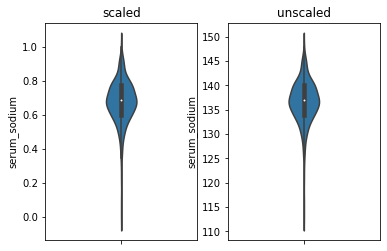

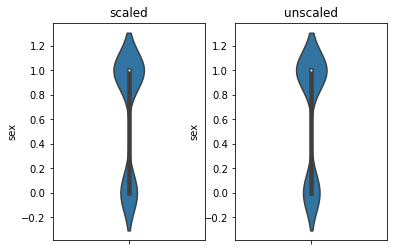

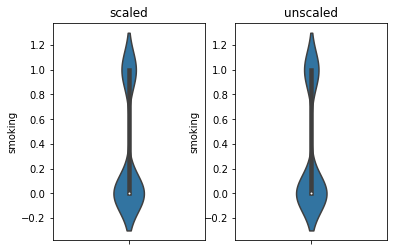

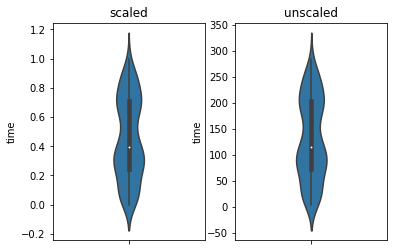

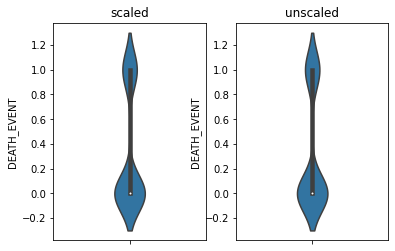

In [4]:
## data scaling 
# Input: df
# Output: df_scaled(data scaled per variable to a range between 0 and 1)

# scaling of the non binary variable collumns for distance based methods
scaler = MinMaxScaler()
print(scaler.fit(df))

# using the min max scaler and then converting the numpy array back to a pandas array
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns.tolist())



# heatmap comparison
fig,(ax1,ax2)= plt.subplots(nrows=2,figsize=(10,16),sharex=True)
sns.heatmap(df,ax=ax2).set_title("unscaled")
sns.heatmap(df_scaled,ax=ax1).set_title("scaled")


# violin plots to confirm scaling
for column in df_scaled :
       fig, (ax1, ax2) = plt.subplots(ncols=2)
       sns.violinplot(y=df_scaled[column],width= 0.2, ax=ax1).set_title("scaled")
       sns.violinplot(y=df[column],width= 0.2, ax=ax2).set_title("unscaled")
        

    

The scaling was succesful and did not significantly alter the distribution of the data that was present. In the next step several methods for imputation will be compared. one single variate approaches, and two multiple variate imputions with 3 variations on one of the multivariate approaches is used. 

the first single variate uses the simple imputation from scikitlearn with the median argument. This calculates the median for a clomun containing a missing value and replaces the missing value with the median.

The second is an multivariate imputation method, for this the IterativeImputer is used with 10 iterative steps. in these steps the algorithm takes a column with missing values and desigintes it with the outcome y. Another column is taken which is set as the X clomun. a regressor function is then fitted on the (x,y) column. This is repeated for the amount of iterative steps after which the misisng value is predicted.

The thrid and last method was the nearest neighbors (knn) imputation method. This algorithm uses an distance matrix based on the euclidean distance of other features. The value for the missing value is estimated based upon the value for this variable found in the KKN. here imputation with 1,3, and 5 KKN was compared.

In [5]:
## imputation of scaled dataframe
# Input: df_scaled
# Output: df_scaled_imp_median (imputation using the median of a column)
#         df_scaled_imp_iterative (imputation using an iterative process)
#         df_scaled_knn1 (imputation using knn with n=1)
#         df_scaled_knn3 (imputation using knn with n=3)
#         df_scaled_knn5 (imputation using knn with n=5)


# function calculating the amount of misisng values in total, per column, per row, and
#   total amount of rows containg missing values 
# input: pandas dataframe
def imputation_stats(dataframe):
    missing_values_per_column = dataframe.isnull().sum()
    missing_values_total = dataframe.isnull().sum().sum()
    missing_values_per_row = []

    for i in range(len(dataframe.index)) :
        x = (dataframe.iloc[i].isnull().sum())
        missing_values_per_row.append(x)

    missing_values_per_row = np.array(missing_values_per_row)
    missing_values_in_rows = missing_values_per_row.sum()
    percentage_of_missing_values = (missing_values_in_rows/len(dataframe))*100

    # output results of missing values amount before imputation
    print('missing values:',missing_values_total)
    print('missing values per row:',missing_values_in_rows)
    print('missing values per row precentage',percentage_of_missing_values,'%')

    
# knn impuation of the missing values.

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_iterative = IterativeImputer(max_iter=10, random_state=42)
knn_1 = KNNImputer(n_neighbors=1)
knn_3 = KNNImputer(n_neighbors=3)
knn_5 = KNNImputer(n_neighbors=5)

df_scaled_imp_median = imp_median.fit_transform(df_scaled)
df_scaled_imp_iterative = imp_iterative.fit_transform(df_scaled)
df_scaled_knn1 = knn_1.fit_transform(df_scaled)
df_scaled_knn3 = knn_3.fit_transform(df_scaled)
df_scaled_knn5 = knn_5.fit_transform(df_scaled)

df_scaled_imp_median = pd.DataFrame(data=df_scaled_imp_median, columns=df.columns.tolist())
df_scaled_imp_iterative = pd.DataFrame(data=df_scaled_imp_iterative, columns=df.columns.tolist())
df_scaled_knn1 = pd.DataFrame(data=df_scaled_knn1, columns=df.columns.tolist())
df_scaled_knn3 = pd.DataFrame(data=df_scaled_knn3, columns=df.columns.tolist())
df_scaled_knn5 = pd.DataFrame(data=df_scaled_knn5, columns=df.columns.tolist())

#printing results of imputation
print('-----before imputation')
imputation_stats(df_scaled)
print('-----single variate imputation based on median')
imputation_stats(df_scaled_imp_median)
print('-----irative imputation')
imputation_stats(df_scaled_imp_iterative)
print('-----KNN n=1 imputation')
imputation_stats(df_scaled_knn1)
print('-----KNN n=3 imputation')
imputation_stats(df_scaled_knn3)
print('-----KNN n=5 imputation')
imputation_stats(df_scaled_knn5)




-----before imputation
missing values: 17
missing values per row: 17
missing values per row precentage 5.68561872909699 %
-----single variate imputation based on median
missing values: 0
missing values per row: 0
missing values per row precentage 0.0 %
-----irative imputation
missing values: 0
missing values per row: 0
missing values per row precentage 0.0 %
-----KNN n=1 imputation
missing values: 0
missing values per row: 0
missing values per row precentage 0.0 %
-----KNN n=3 imputation
missing values: 0
missing values per row: 0
missing values per row precentage 0.0 %
-----KNN n=5 imputation
missing values: 0
missing values per row: 0
missing values per row precentage 0.0 %


All imputation methods imputed all the missing values in the dataset. However it is important to observere if this imputation altered the distributiun of the dataset. visualization was used to asses this.

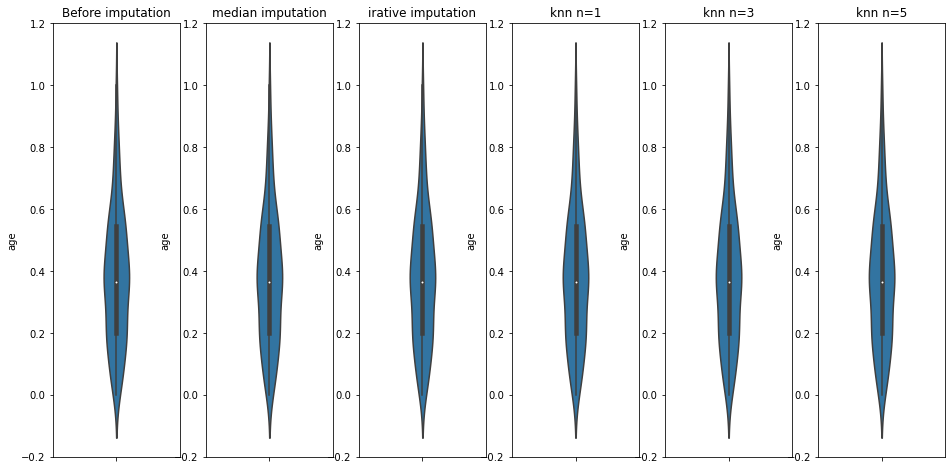

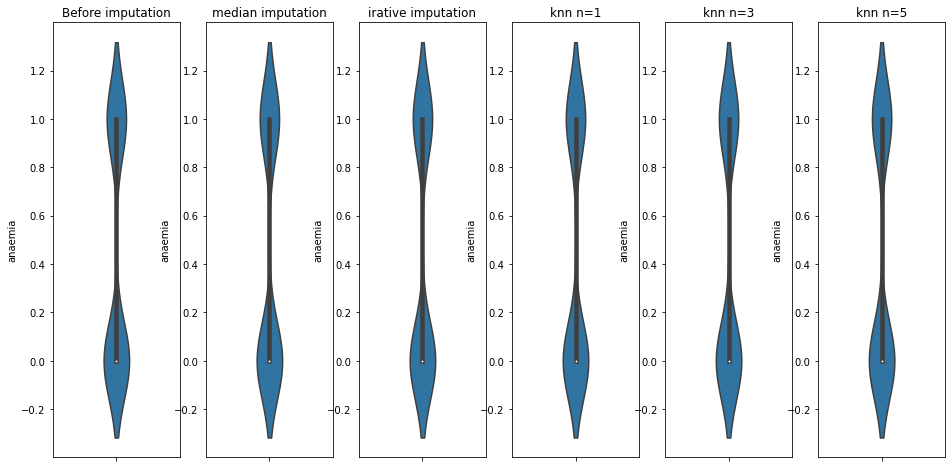

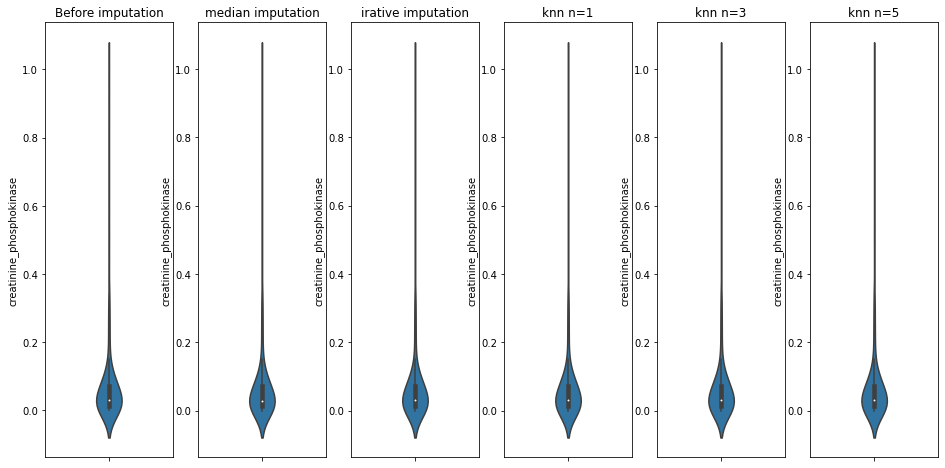

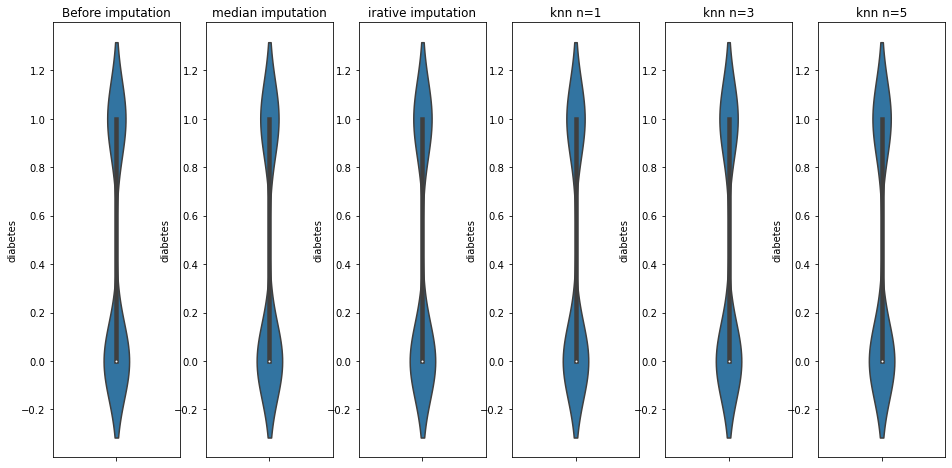

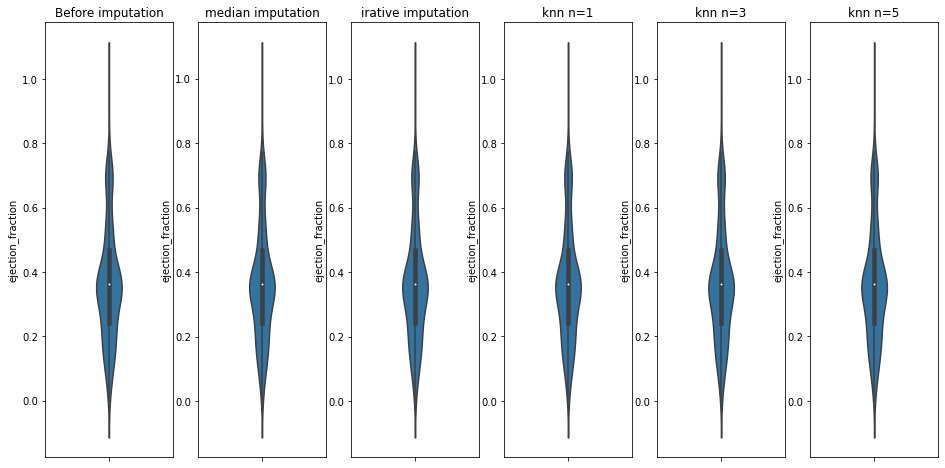

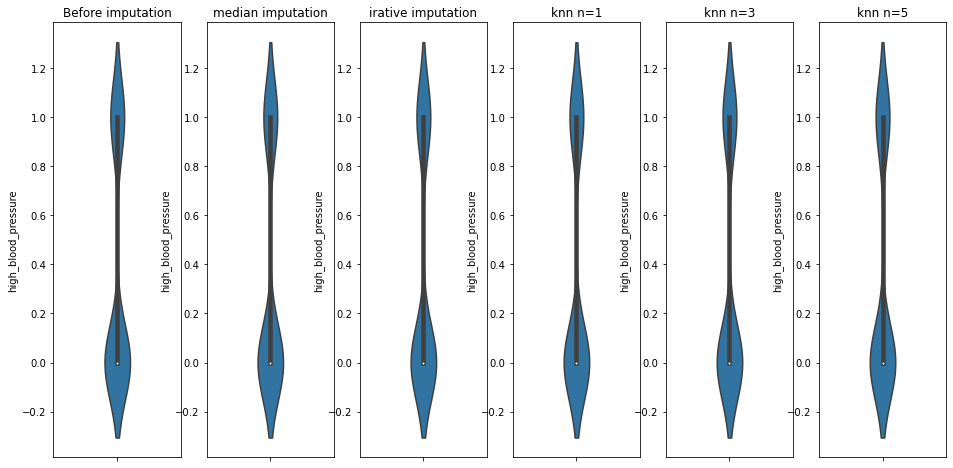

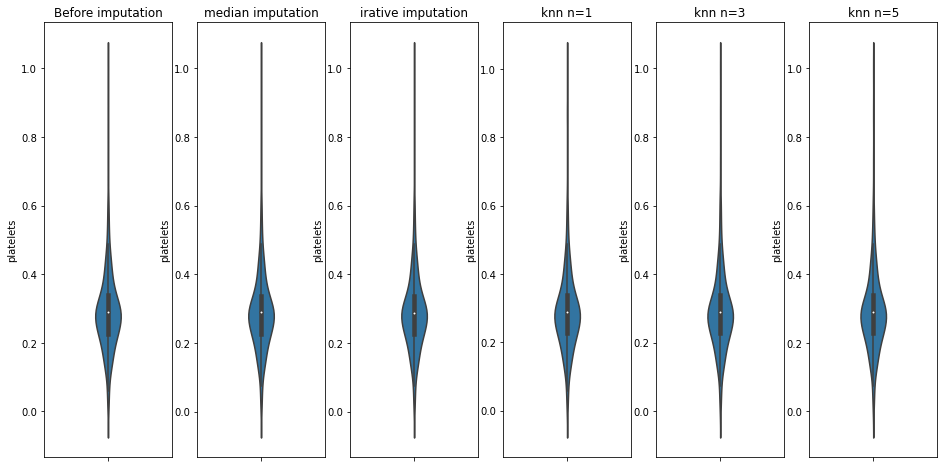

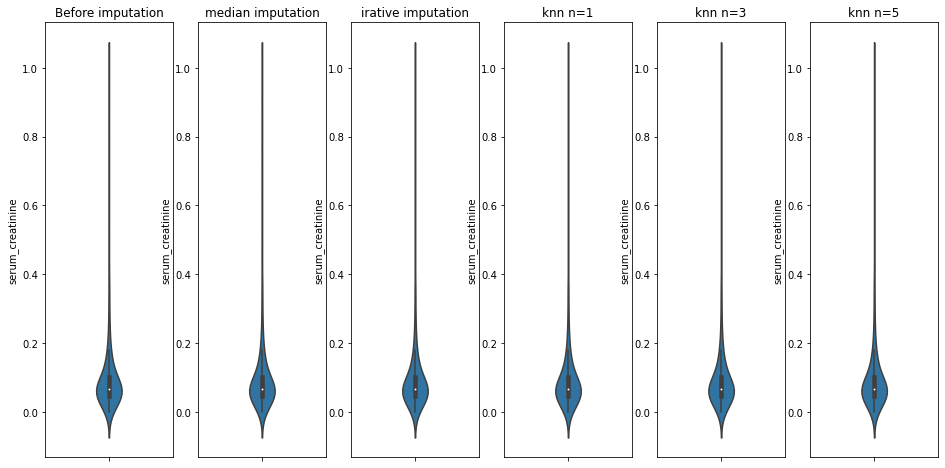

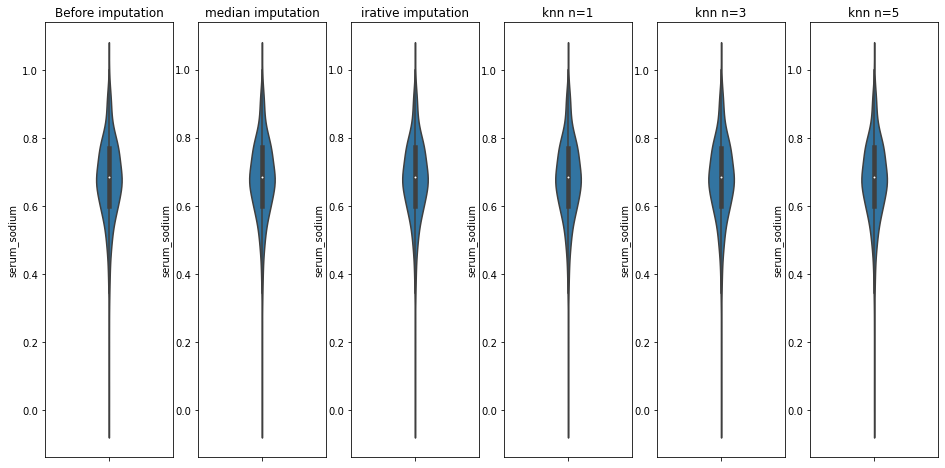

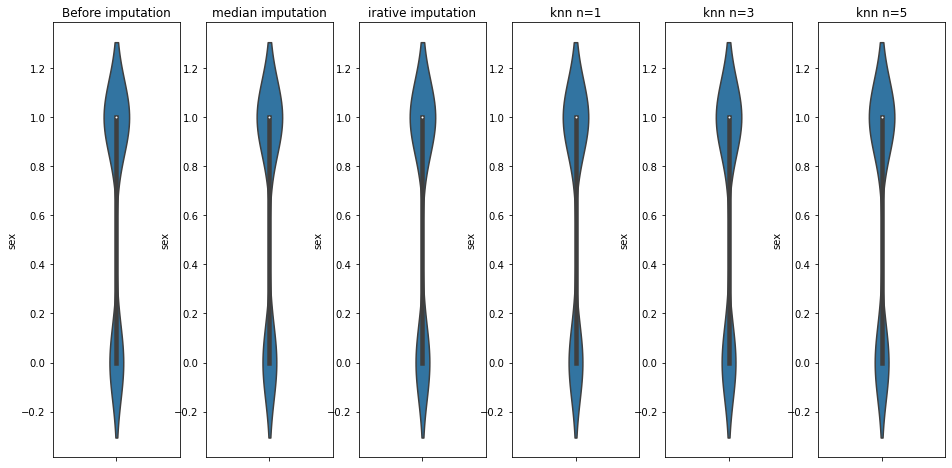

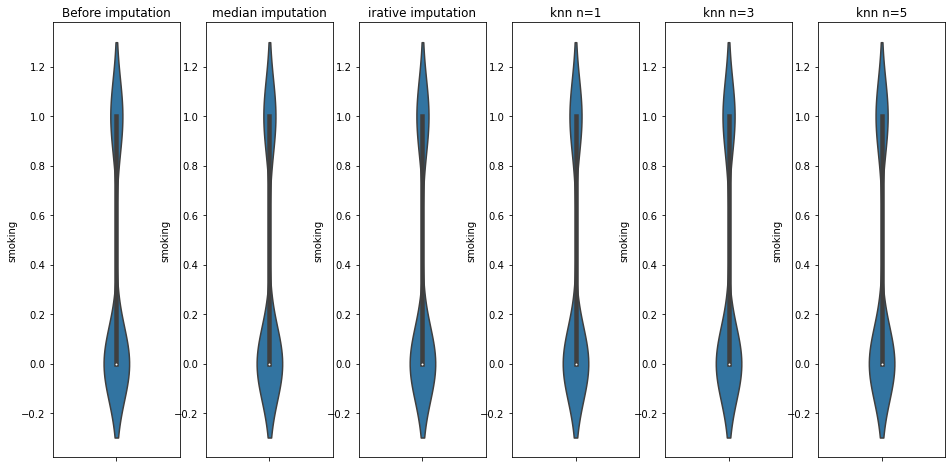

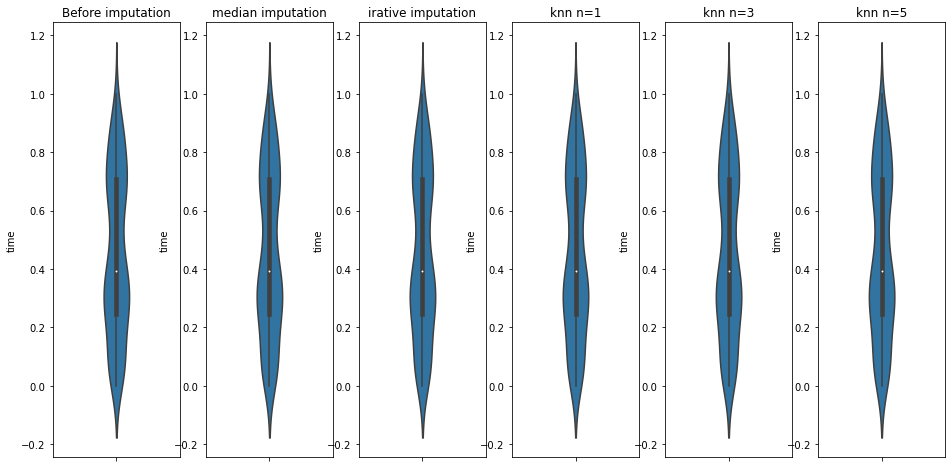

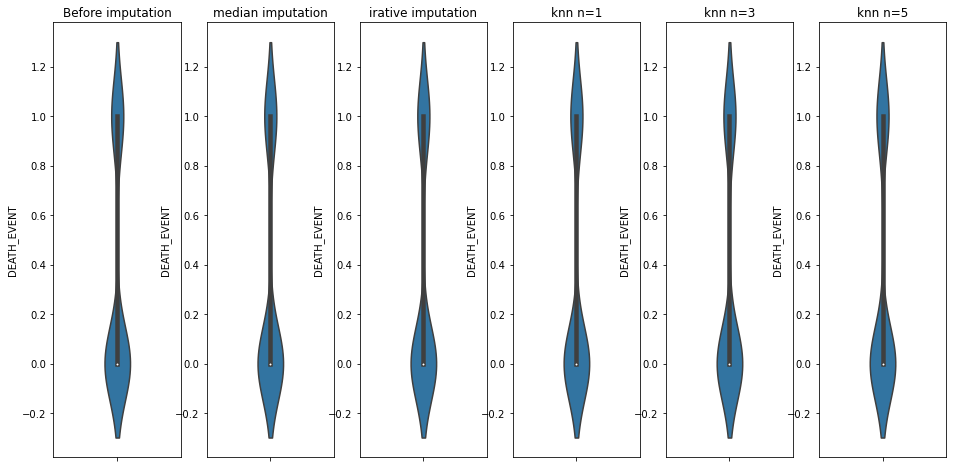

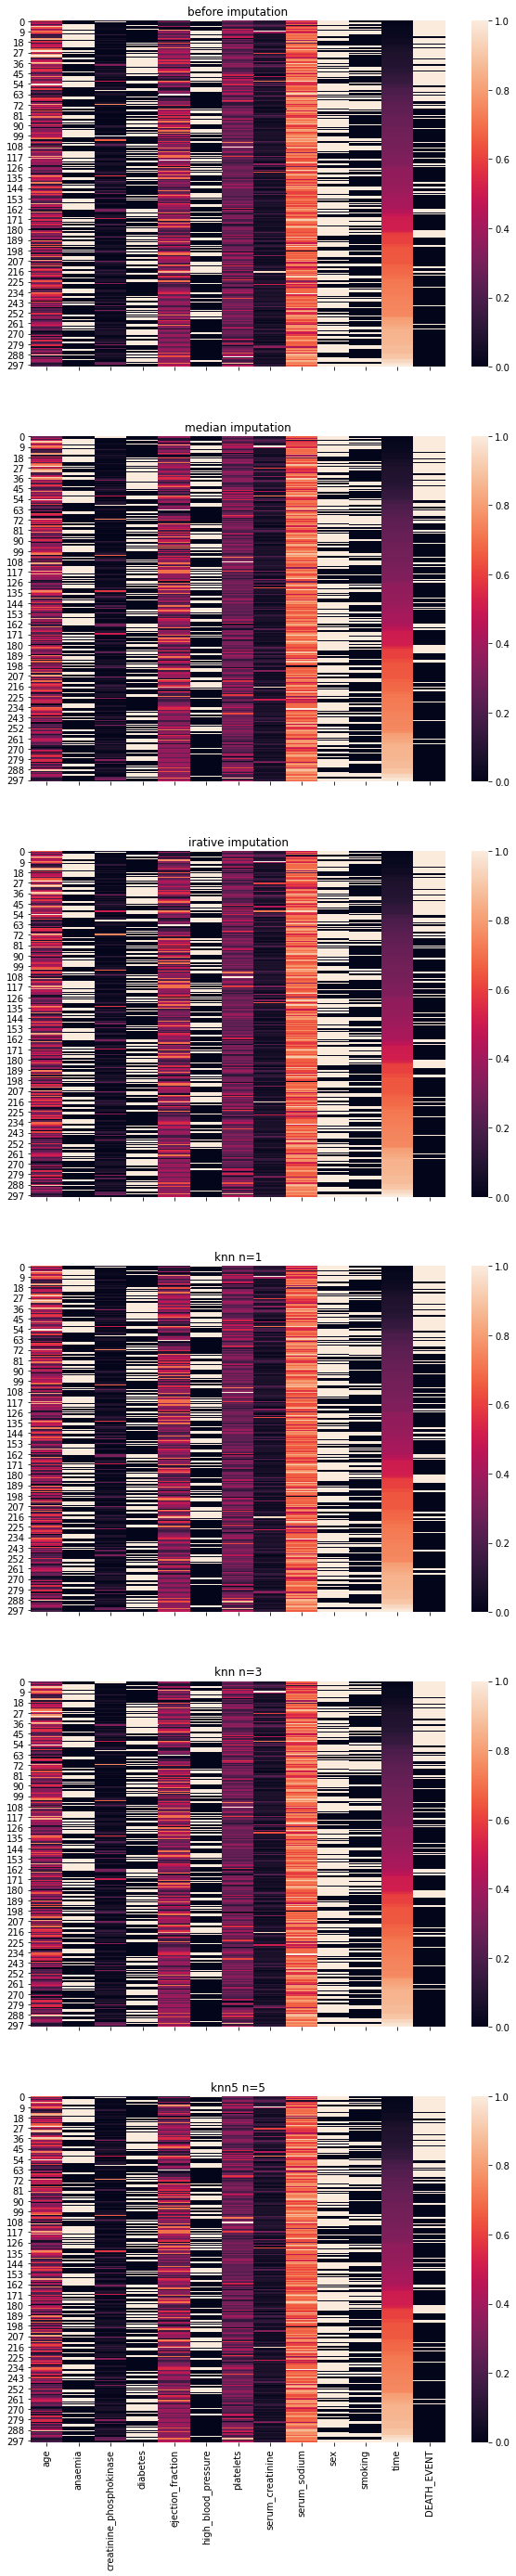

In [6]:
## visualization of imputation
# input: df_scaled_imp_median
#         df_scaled_imp_iterative
#         df_scaled_knn1
#         df_scaled_knn3
#         df_scaled_knn5
# output: df_scaled_imputed (set using results obtained)

# visiulization using violin plots
for column in df_scaled :
       fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6,figsize=(16,8))
       sns.violinplot(y=df_scaled[column],width= 0.2, ax=ax1).set_title("Before imputation")
       sns.violinplot(y=df_scaled_imp_median[column],width= 0.2, ax=ax2).set_title("median imputation")
       sns.violinplot(y=df_scaled_imp_iterative[column],width= 0.2, ax=ax3).set_title("irative imputation")
       sns.violinplot(y=df_scaled_knn1[column],width= 0.2, ax=ax4).set_title("knn n=1")
       sns.violinplot(y=df_scaled_knn3[column],width= 0.2, ax=ax5).set_title("knn n=3")
       sns.violinplot(y=df_scaled_knn5[column],width= 0.2, ax=ax6).set_title("knn n=5")
        
#heatmaps
fig,(ax1, ax2, ax3, ax4, ax5, ax6)= plt.subplots(nrows=6,figsize=(10,48),sharex=True)
sns.heatmap(df_scaled,ax=ax1).set_title("before imputation")
sns.heatmap(df_scaled_imp_median,ax=ax2).set_title("median imputation")
sns.heatmap(df_scaled_imp_iterative,ax=ax3).set_title("irative imputation")
sns.heatmap(df_scaled_knn1,ax=ax4).set_title("knn n=1")
sns.heatmap(df_scaled_knn3,ax=ax5).set_title("knn n=3")
sns.heatmap(df_scaled_knn5,ax=ax6).set_title("knn5 n=5")

# based on the results an imputation method is set here 
df_scaled_imputed = df_scaled_knn3

The methods for imputations did not alter signigicantly the distributions of the dataset. This could be due to the low amount of missing values. In the end the knn imputation method with kkn=3 was used as the primary imputation method. 

The imputation based on the median was not preferred as this is based on a single variate method, there is also the possibility that with more missing values this will alter the distribution to the median. This is because this method does not look at the other values and only replaces the missing values with the median of the dataframe. the itterative imputation method gave a good result and is not dependent upon the distance of the values (which is nice for the data in this dataset). However a big caviate is that this function is still in experimental development and can be changed in the future. It was dicided that due to this another imputation method will be used to ensure future functionality. The three variations upon the knnimputer gave a similair result. it was decided here that the most simple would be best. with the caveat the the reliance one 1 nearest neighbor might be prone to irregular (anomoly values) values in the nearest neighbors.

In this script the individual variables were explored in the initial data exploration and visualization. To explore the  underlying structures in the dataset PCA was used.

[0.38449333 0.20061315 0.14933171 0.07981441 0.06837864 0.06504686
 0.0523219 ]
1.0


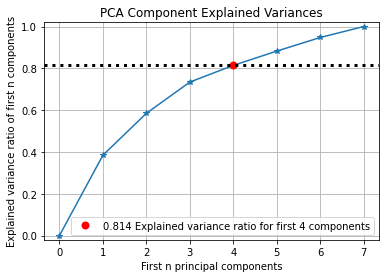

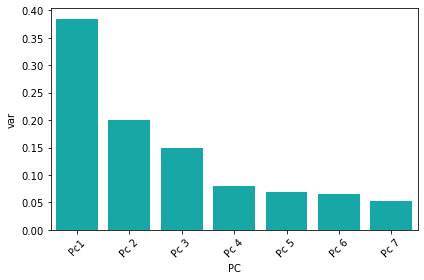

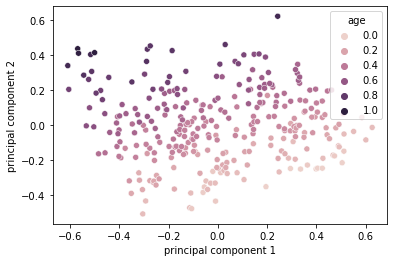

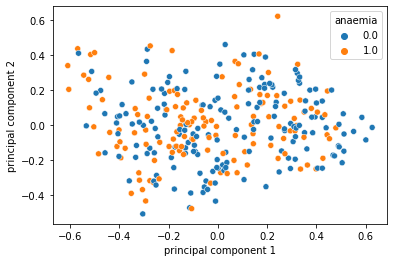

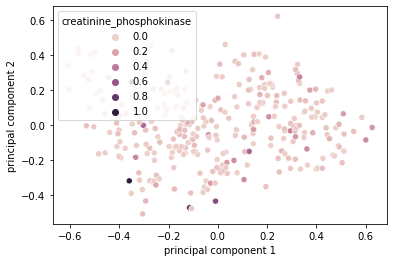

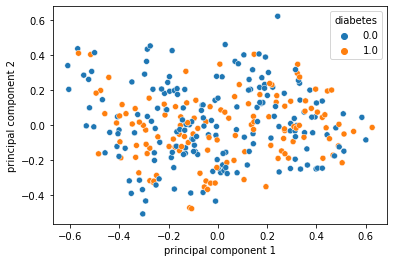

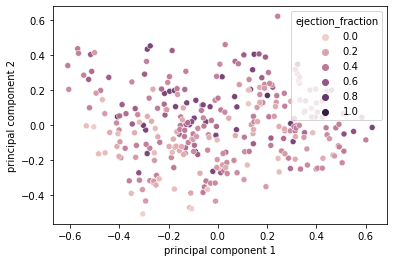

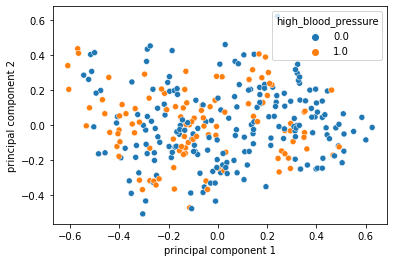

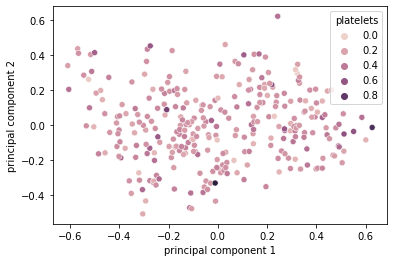

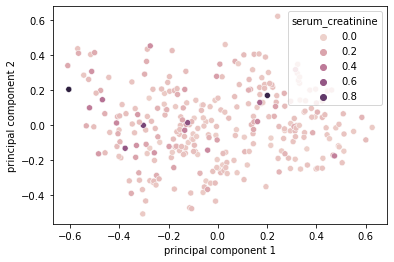

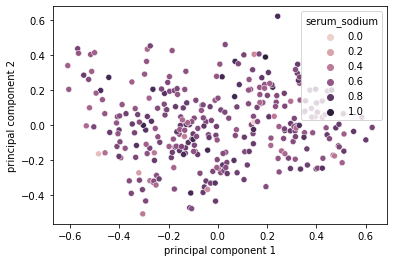

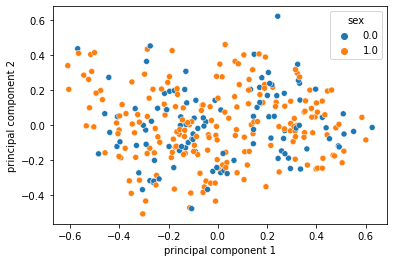

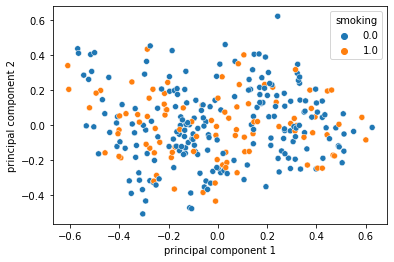

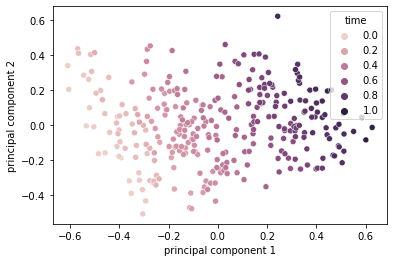

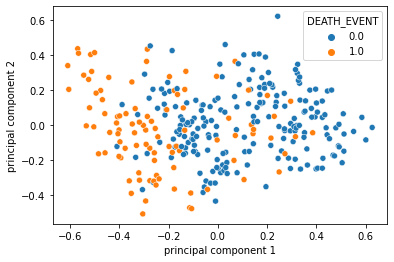

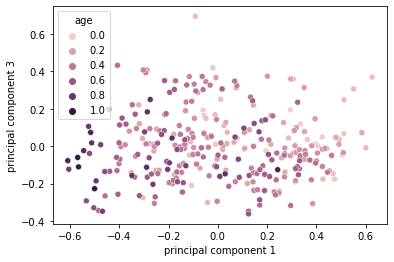

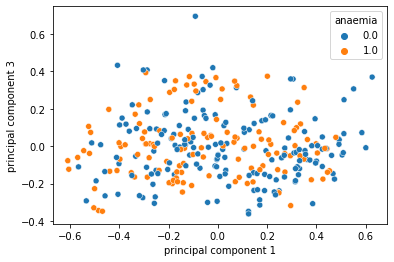

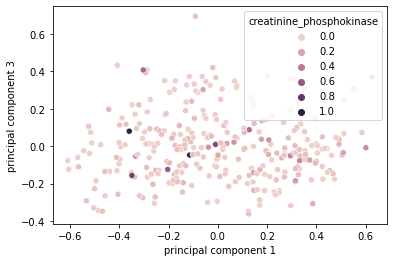

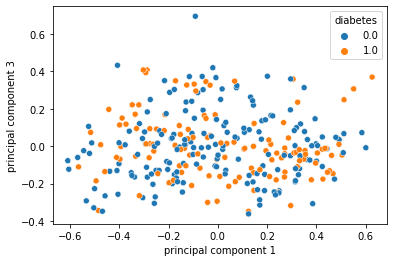

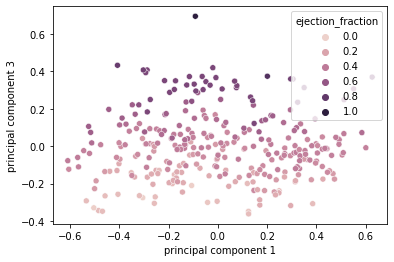

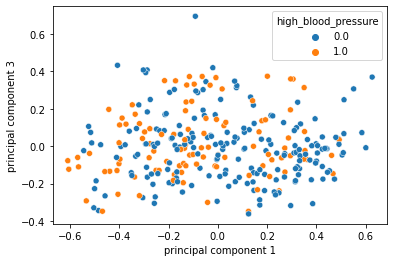

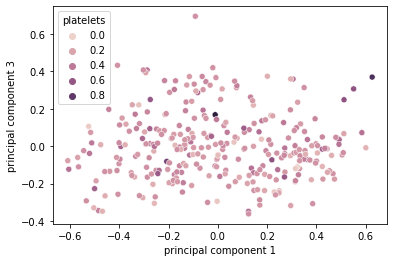

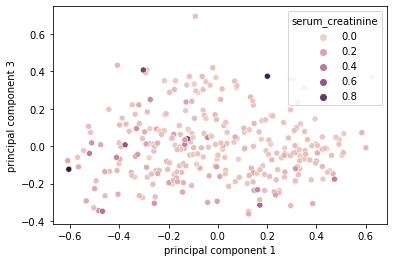

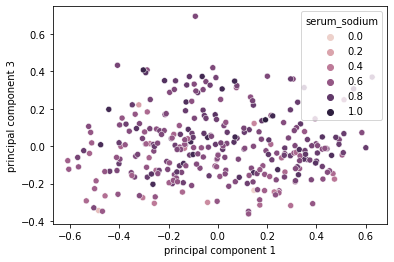

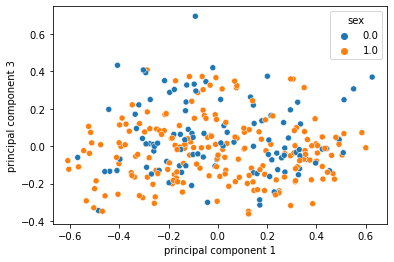

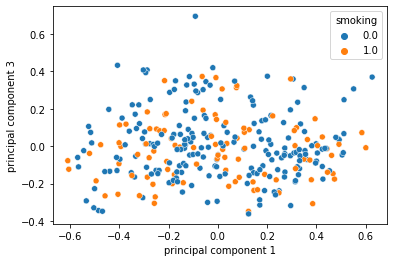

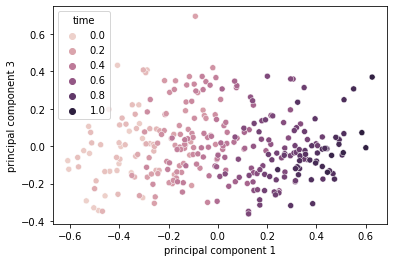

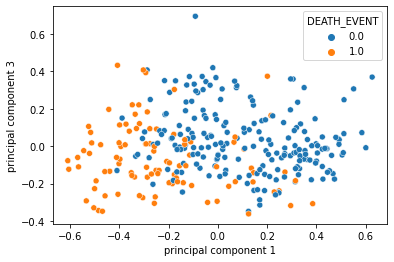

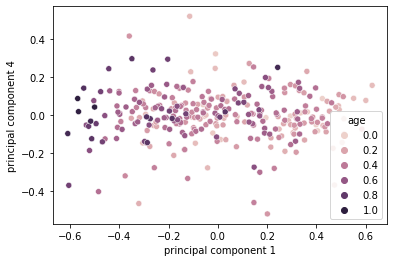

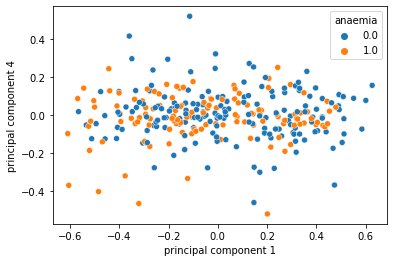

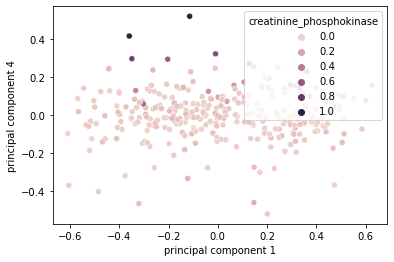

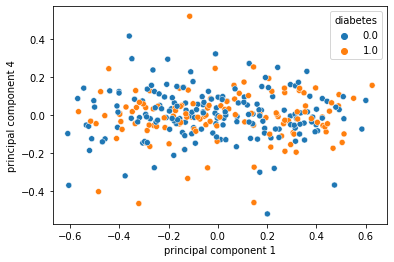

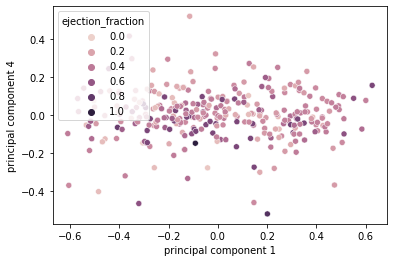

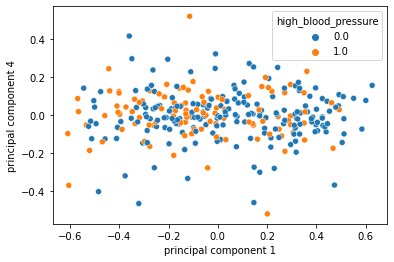

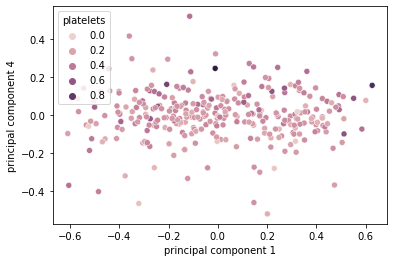

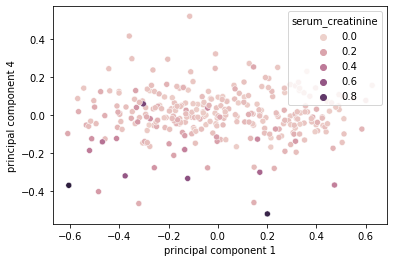

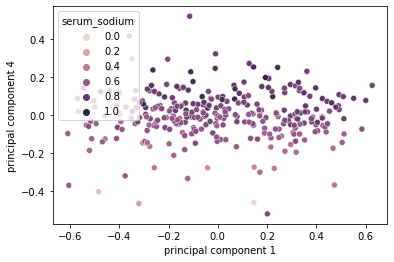

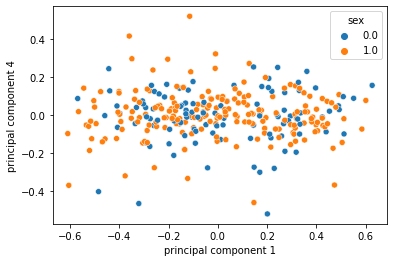

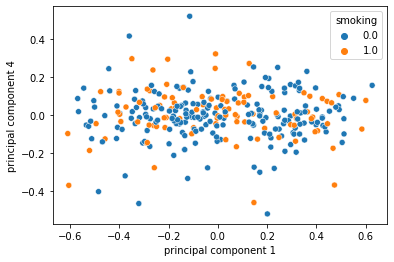

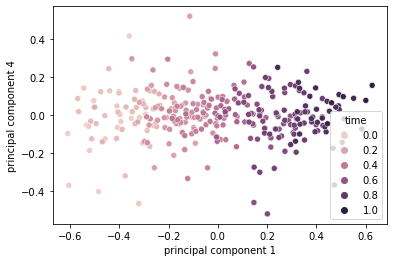

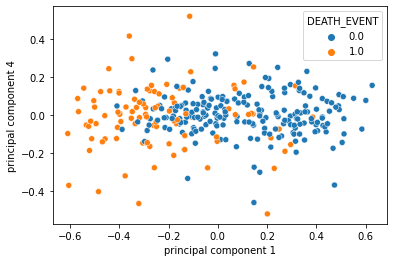

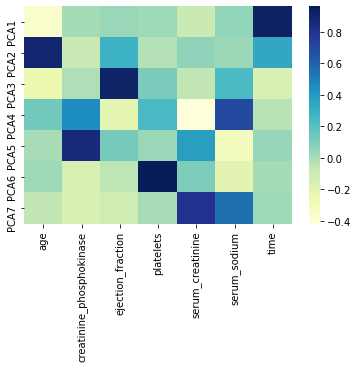

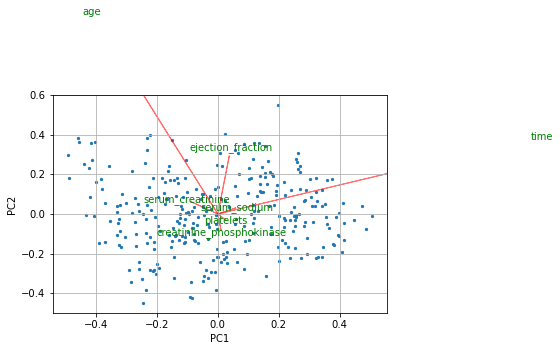

In [9]:
## PCA 

# note to self only do the pca on the contineuos data

# subset continous data for pca

df_pca = df_scaled_imputed[['age',
                           'creatinine_phosphokinase',
                           'ejection_fraction',
                           'platelets',
                           'serum_creatinine',
                           'serum_sodium',
                           'time']]

# PCA function for later use

def pca_function(continous_data,whole_data):
    pca = PCA(n_components=7,svd_solver='full')

    principalComponents = pca.fit_transform(continous_data)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 
                          'principal component 2',
                          'principal component 3',
                          'principal component 4',
                          'principal component 5',
                          'principal component 6',
                          'principal component 7'])
                          

    print(pca.explained_variance_ratio_)
    print(sum(pca.explained_variance_ratio_))

    df_PCA_fitted = pd.concat([principalDf, whole_data], axis = 1)
    
    #variance plot
    import scikitplot as skplt
    skplt.decomposition.plot_pca_component_variance(pca)
    plt.show()



    #scree plot
    Scree_Points = pd.DataFrame({'var':pca.explained_variance_ratio_,
                 'PC':['Pc1',
                       'Pc 2',
                       'Pc 3',
                       'Pc 4',
                       'Pc 5',
                       'Pc 6',
                       'Pc 7']})

    plt.figure()
    sns.barplot(data=Scree_Points, x='PC',y="var", color="c");
    plt.xticks(rotation=45)
    plt.tight_layout()

    
    #visualization for PC1,PC2, and PC4
    for column in whole_data :
        plt.figure()
        sns.scatterplot(data=df_PCA_fitted,x="principal component 1", y="principal component 2", hue=column)
    for column in whole_data :
        plt.figure()
        sns.scatterplot(data=df_PCA_fitted,x="principal component 1", y="principal component 3", hue=column)
    for column in whole_data :
        plt.figure()
        sns.scatterplot(data=df_PCA_fitted,x="principal component 1", y="principal component 4", hue=column)
    plt.show()
    
    # heatmap for variance explained by continouis variable
    ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(continous_data.columns))
    plt.show()
    
    # biplot
    def biplot(score,coeff,labels=None):
        #biplot function 
        xs = score[:,0]
        ys = score[:,1]
        n = coeff.shape[0]
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
        plt.scatter(xs * scalex,ys * scaley,s=5)
        for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
            if labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
        plt.xlabel("PC{}".format(1))
        plt.ylabel("PC{}".format(2))
        plt.grid()

    biplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]),list(continous_data.columns))
    plt.show()

    
# 3d plot 
def plot_3d(pc1,pc2,pc3):
    # Configure Plotly to be rendered inline in the notebook.
    plotly.offline.init_notebook_mode()

    # Configure the trace.
    trace = go.Scatter3d(
        x=pc1,  # <-- Put your data instead
        y=pc2,  # <-- Put your data instead
        z=pc3,  # <-- Put your data instead
        mode='markers',
        marker={
            'size': 2,
            'opacity': 0.8,
        }
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
           
    )

    data = [trace]

    plot_figure = go.Figure(data=data, layout=layout)

    # Render the plot.
    plotly.offline.iplot(plot_figure)


    
    
    
pca_function(df_pca,df_scaled_imputed)
# plot_3d(df_PCA_fitted["principal component 1"],df_PCA_fitted["principal component 2"],df_PCA_fitted["principal component 3"])










Several intressting trends were seen here. both time and age seem to cause the most variation in the data set. due to the length of the vectors they have in the biplot. Time seems to roughly correspond to the variation seen in principle component (PC) 1, and age seems to correspond with the PC2. The target variable seems to also be distributed along side the PC1. This significance that the the main variation is caused by the time peopel are included in the study and by extent the Death of the patient. This is strange as age does not seem to effect the Death which was logically assumed before. However, PCA is prone to change due to outliers. this step was not preformed before this PCA result.

So the next step was outlier detection. Outliers were detected using undirected random forest (isolation forest). for this the isolation forest function in the scikitlearn module was used. This algorithm  randomly selects and splits them based on a arbriray value in its distribution. the amount of splits neccesary to reach a terminal node is used as the path length. this path length is for each endnode is averaged for all the trees in the forest, and is used as a measure of normality in the decision function. The logic how this algorthim detects anomolies is that for anomalous data point short paths are generated than for non-anomalous data points. 

In the code below it was assumed that the outliers consist of 5 % of the data. if the alogrithm detects based on its internal automatic algorithm it flags 1/3 of the data as anomolous. This is likey due to the different nature of the variables. 5% was choosen so that these most anomolous points could be removed for the PCA without removing a significant portion of the data (1/3).

total amount of outliers: 15
index location: [4, 5, 9, 19, 37, 52, 60, 72, 105, 117, 163, 187, 199, 217, 296]
MinMaxScaler()
total samples after removal of outliers: 284
total death events with outliers: 96.0
total death event without outliers: 84.0
percentage death event with outliers: 32.10702341137124 %
percentage death event without outliers: 29.577464788732392 %


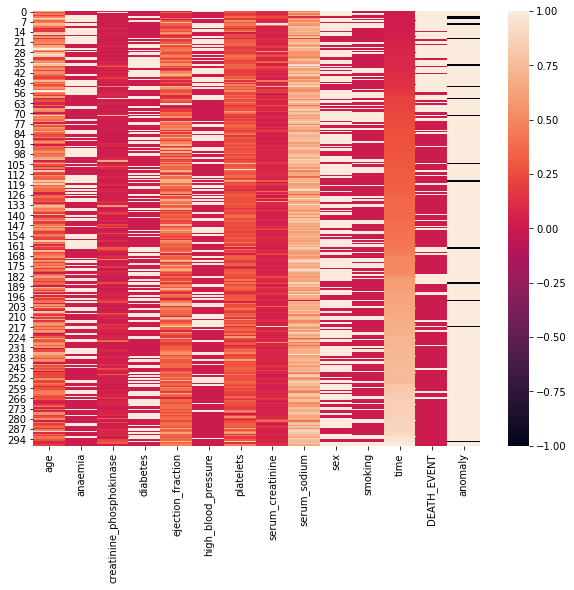

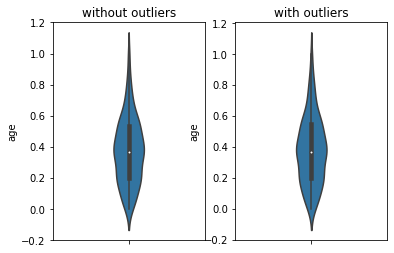

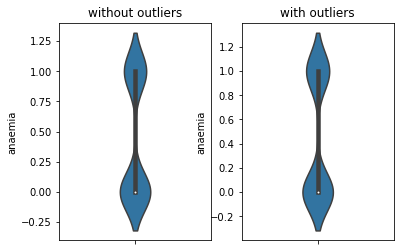

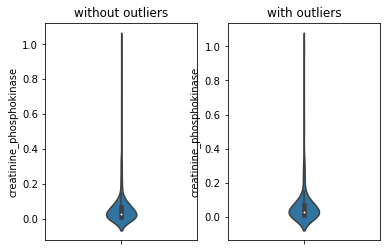

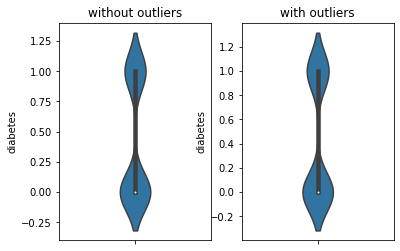

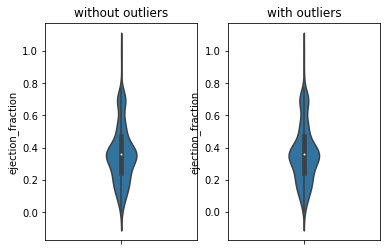

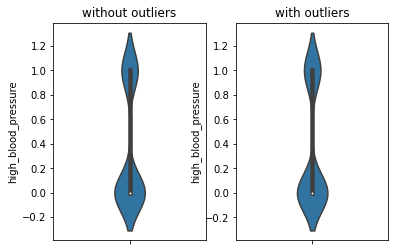

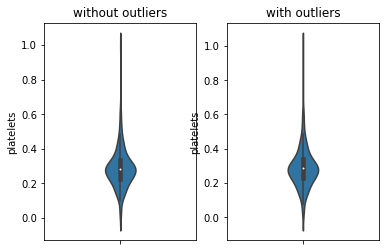

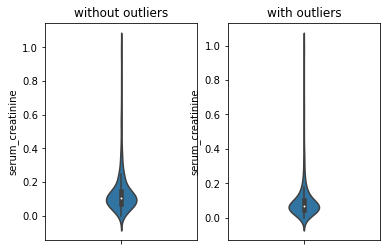

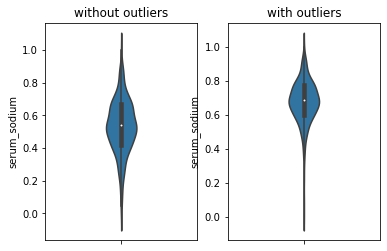

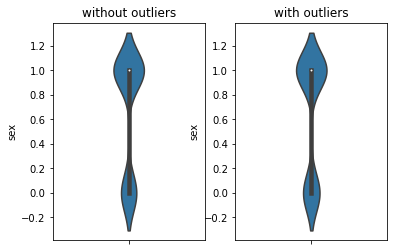

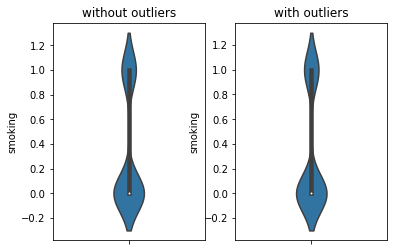

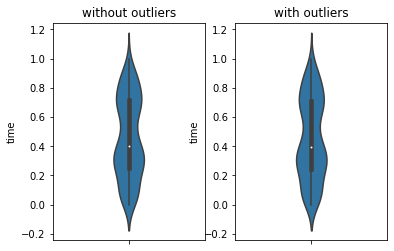

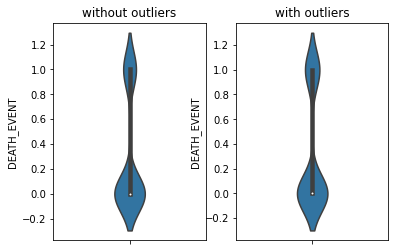

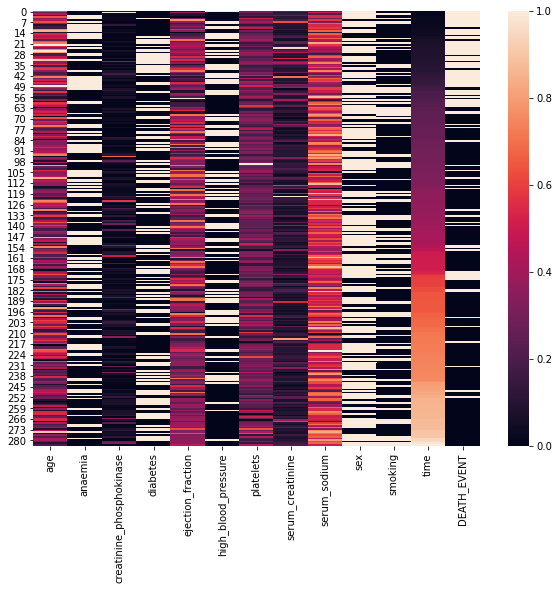

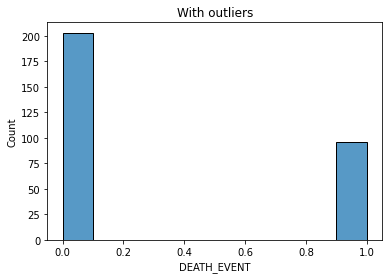

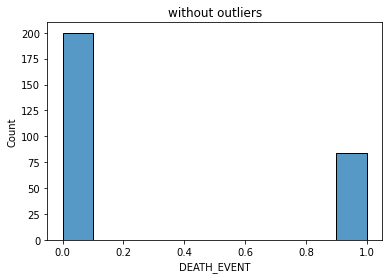

In [10]:
## outlier detection using isolation forest
# input: df_scaled_imputed
# output: df_scaled_imputed_wo_outliers
#         anomaly
#         anomaly_index
#         df_scaled_imputed_anomaly

# outlier detection using isolation forest 
outliers_fraction = 0.05

#prep anomoly detection
df_scaled_imputed_anomaly = df_scaled_imputed

URF=IsolationForest(n_estimators=100, max_samples='auto',random_state=42,contamination=outliers_fraction)
URF.fit(df_scaled_imputed)

#df_scaled_imputed['scores']=URF.decision_function(df_scaled_imputed)
df_scaled_imputed_anomaly['anomaly']=URF.predict(df_scaled_imputed)
df_scaled_imputed_anomaly.head(20)

anomaly = df_scaled_imputed_anomaly.loc[df_scaled_imputed['anomaly']==-1]
anomaly_index = list(anomaly.index)

print('total amount of outliers:',len(anomaly_index))
print('index location:',anomaly_index)


# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled_imputed)




# dropping the 'Outliers' and rescaling
df_scaled_imputed_wo_outliers  = df_scaled_imputed
df_scaled_imputed_wo_outliers  = df_scaled_imputed_wo_outliers.drop(anomaly_index)
df_scaled_imputed_wo_outliers = df_scaled_imputed_wo_outliers.drop(['anomaly'], axis=1) #dropping column anomaly


scaler = MinMaxScaler()
print(scaler.fit(df_scaled_imputed_wo_outliers))


df_scaled_imputed_wo_outliers_temp = scaler.transform(df_scaled_imputed_wo_outliers)
df_scaled_imputed_wo_outliers = pd.DataFrame(data=df_scaled_imputed_wo_outliers_temp, columns=df.columns.tolist())

print('total samples after removal of outliers:',len(df_scaled_imputed_wo_outliers))


# visualization of outliers dropping
for column in df_scaled_imputed_wo_outliers :
       fig, (ax1, ax2) = plt.subplots(ncols=2)
       sns.violinplot(y=df_scaled_imputed_wo_outliers[column],width= 0.2, ax=ax1).set_title("without outliers")
       sns.violinplot(y=df_scaled_imputed[column],width= 0.2, ax=ax2).set_title("with outliers")
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled_imputed_wo_outliers)

#histplot for death events
plt.figure()
sns.histplot(data=df_scaled_imputed, x='DEATH_EVENT').set_title("With outliers")
plt.figure()
sns.histplot(data=df_scaled_imputed_wo_outliers, x='DEATH_EVENT').set_title("without outliers")

#death events statistics

total_death_event_w_outliers = df_scaled_imputed['DEATH_EVENT'].sum()
total_death_event_wo_outliers = df_scaled_imputed_wo_outliers['DEATH_EVENT'].sum()       
total_death_event_w_outliers_percentage =(total_death_event_w_outliers/len(df_scaled_imputed))*100
total_death_event_wo_outliers_percentage =(total_death_event_wo_outliers/len(df_scaled_imputed_wo_outliers))*100

print('total death events with outliers:',total_death_event_w_outliers)
print('total death event without outliers:',total_death_event_wo_outliers)
print('percentage death event with outliers:',total_death_event_w_outliers_percentage, '%')
print('percentage death event without outliers:',total_death_event_wo_outliers_percentage,'%')

After the outlier detection and removal, the PCA algorithm was executed again. 

[0.36871147 0.19422308 0.16534631 0.10567318 0.06537584 0.05478686
 0.04588326]
0.9999999999999999


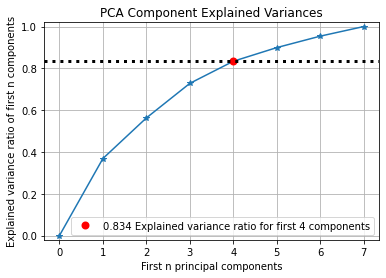

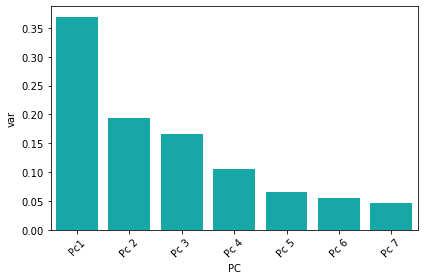

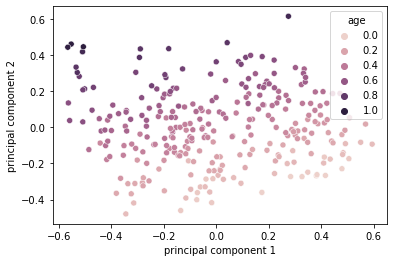

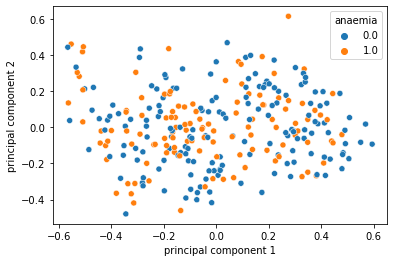

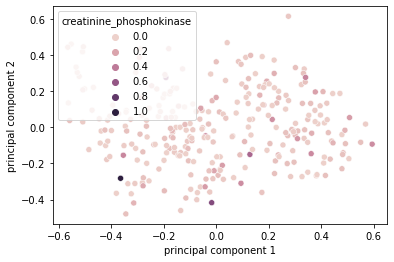

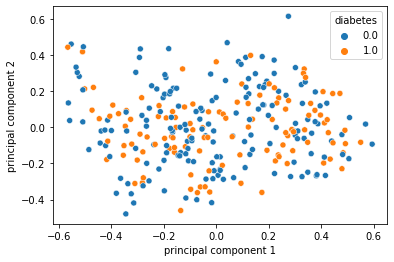

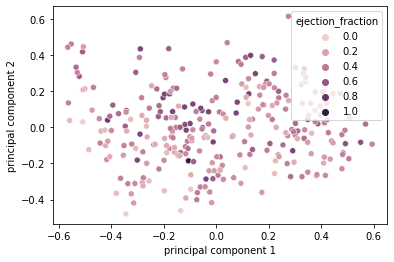

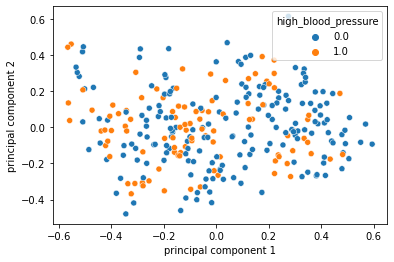

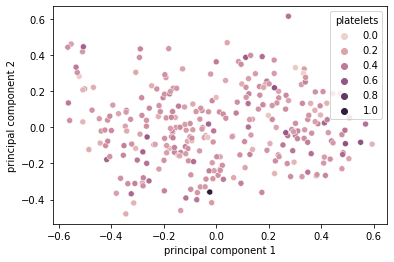

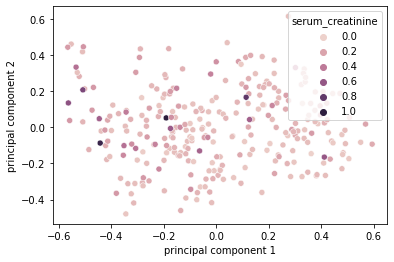

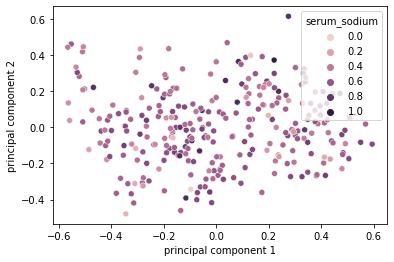

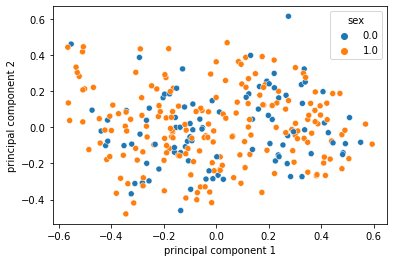

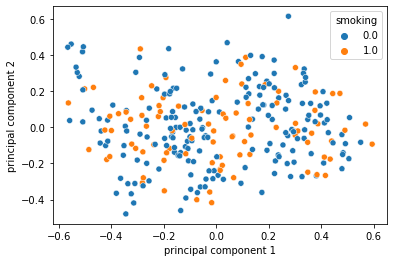

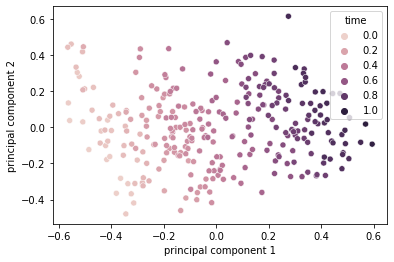

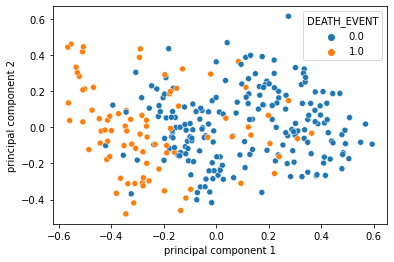

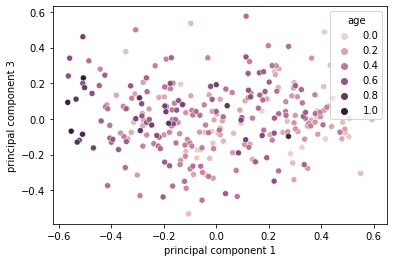

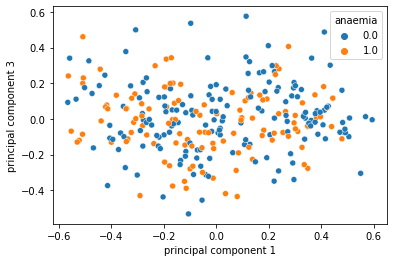

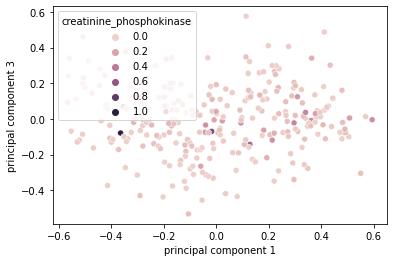

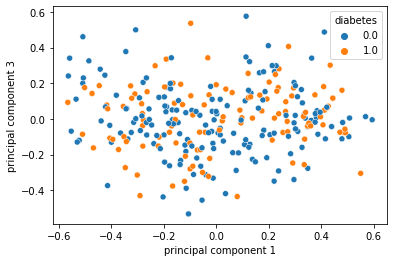

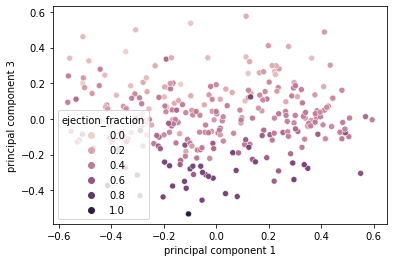

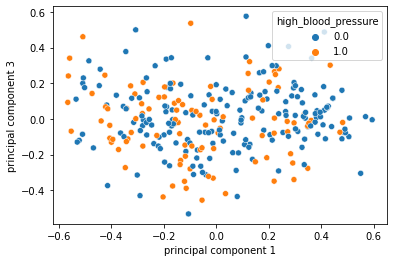

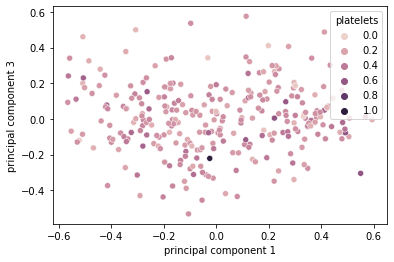

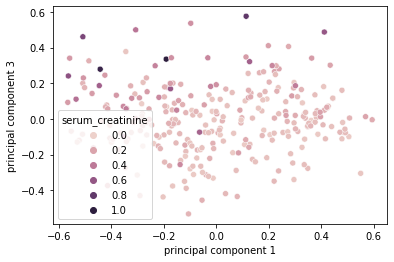

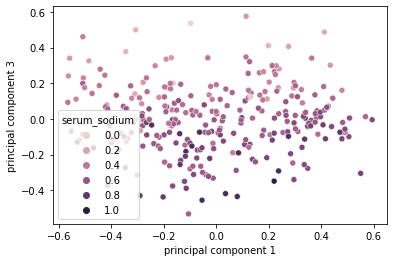

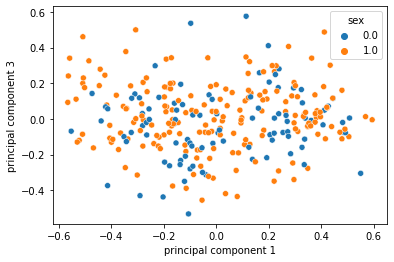

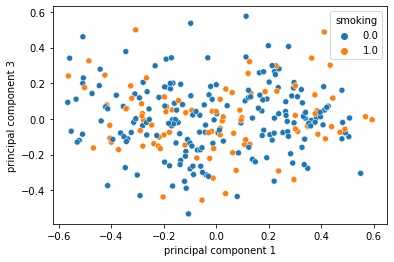

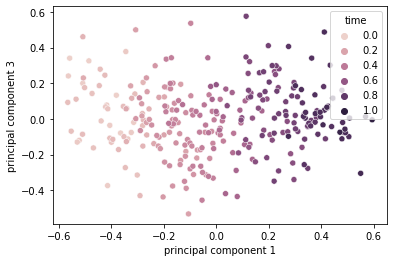

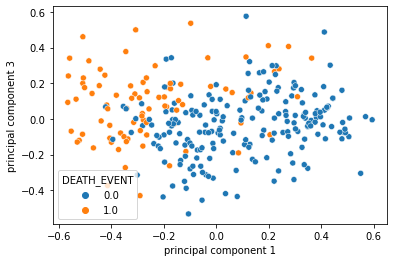

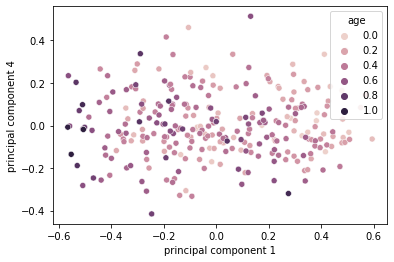

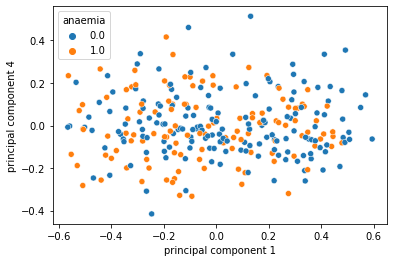

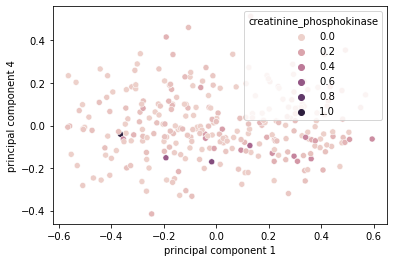

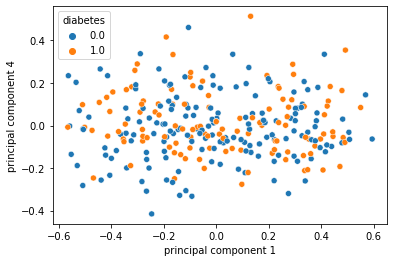

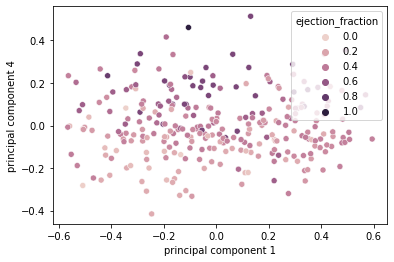

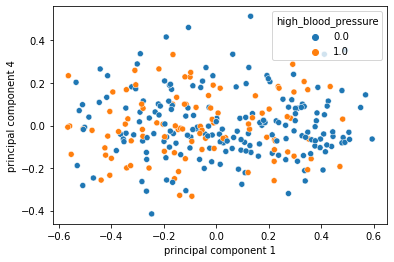

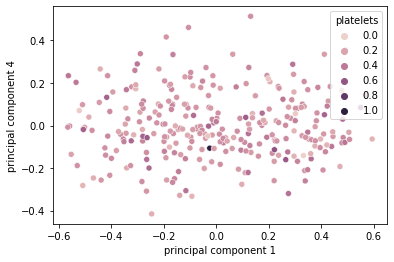

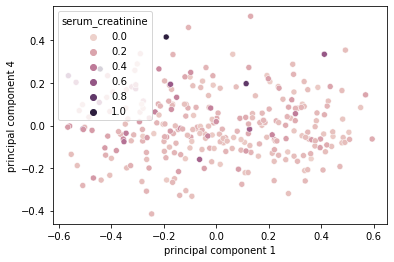

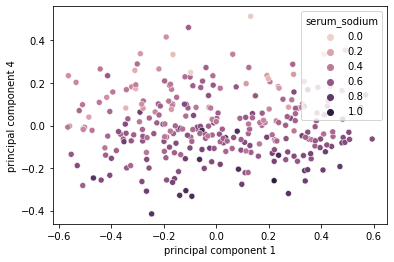

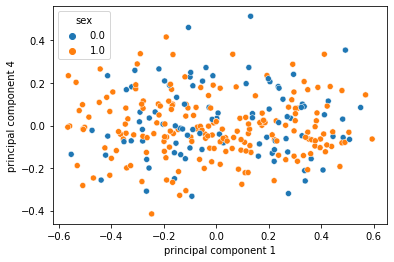

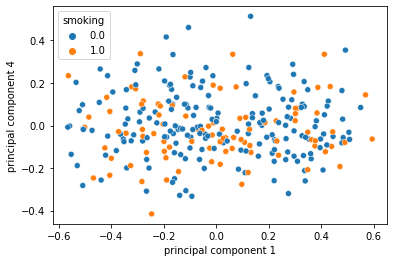

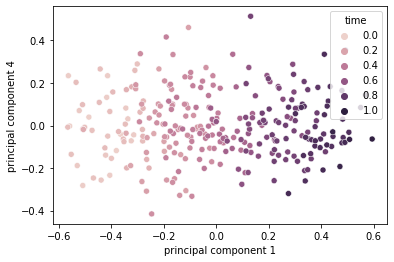

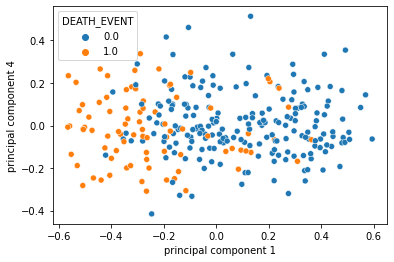

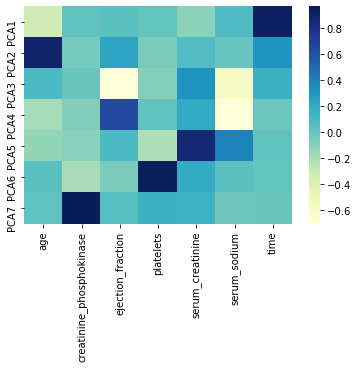

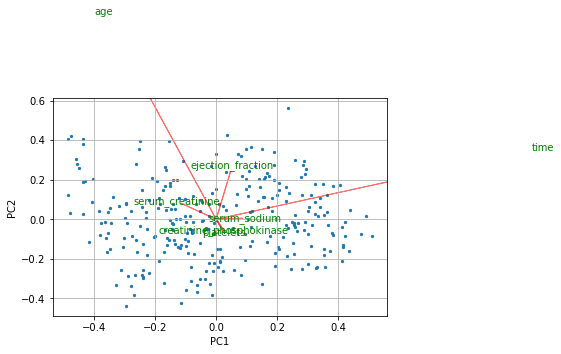

In [11]:
# subset continous data for pca
df_pca_2 = df_scaled_imputed_wo_outliers[['age',
                           'creatinine_phosphokinase',
                           'ejection_fraction',
                           'platelets',
                           'serum_creatinine',
                           'serum_sodium',
                           'time']]

pca_function(df_pca_2,df_scaled_imputed_wo_outliers)
#plot_3d(df_PCA_fitted["principal component 1"],df_PCA_fitted["principal component 2"],df_PCA_fitted["principal component 3"])







This result is rather strange as the the two biggest contributors to the effects is time and age. In order to further explore this correlation analysis is done for time and death and age and death. to see which correlates more to this event. This was done because it was believed that time is correlated with death based on the plots from the exploratorie analysis, and it would be logical that age would also correlate with the death event. this correlation analysis will be done using Point-Biserial Correlation Coefficient which can correlate between binary and continouse data. this test is based on the pearson correlation test.

In [12]:
## correlation analysis based on Point-Biserial Correlation Coefficient python Point-Biserial Correlation Coefficient 
#Input:
#Output:

from scipy import stats

biserial_correlation_time_death = stats.pointbiserialr(df_scaled_imputed_wo_outliers['DEATH_EVENT'],
                                                      df_scaled_imputed_wo_outliers['time'])
biserial_correlation_age_death = stats.pointbiserialr(df_scaled_imputed_wo_outliers['DEATH_EVENT'],
                                                      df_scaled_imputed_wo_outliers['age'])
biserial_correlation_ejection_fraction_death = stats.pointbiserialr(df_scaled_imputed_wo_outliers['DEATH_EVENT'],
                                                                      df_scaled_imputed_wo_outliers['ejection_fraction'])


print("time and death corr:", biserial_correlation_time_death)
print("age and death corr:", biserial_correlation_age_death)
print("ejection fraction and death corr:", biserial_correlation_ejection_fraction_death)

time and death corr: PointbiserialrResult(correlation=-0.5154624463902021, pvalue=1.1172344871045018e-20)
age and death corr: PointbiserialrResult(correlation=0.25206812139927526, pvalue=1.7171885804936832e-05)
ejection fraction and death corr: PointbiserialrResult(correlation=-0.3164896034710815, pvalue=5.014120584389607e-08)


time and death according to the point biserial are moderatly negativly correlated. wile age and death are weakly positively correlated. this oposition to each other (negatively and positively) explains there almost orthogonal vectors in the biplot. 

The last step in the preproccessing and initial data explorations is saving the results of the preprocesses in a function for further use in classification on the different train and test sets. this is done for the scaling and imputation. for the outlier detection this is not done as for now this is dependent on a given percentage of outliers. thus it will varies in the outlier detected based on an arbitrary p value.

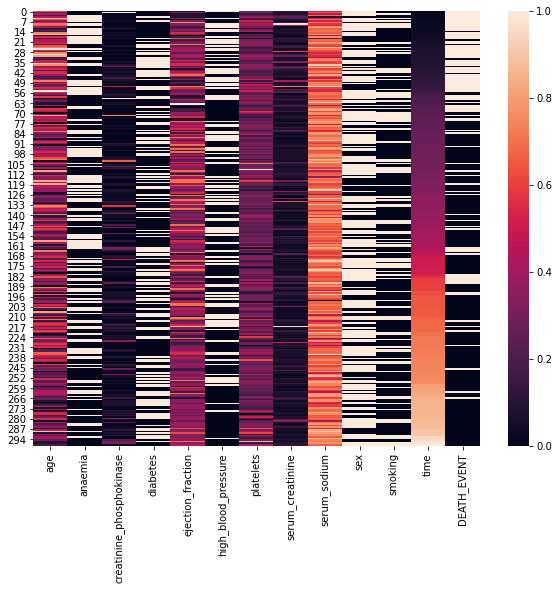

In [13]:
# function for the pre-process pipeline
def preprocess (dataframe):
    # packages neccesary for the pre-processing
    from sklearn.impute import KNNImputer
    from sklearn.impute import SimpleImputer
    
    # models based on prevouis data exploration 
    scaler = MinMaxScaler()
    knn_3 = KNNImputer(n_neighbors=3)
    
    # scaling is done first
    scaler.fit(dataframe)
    df_scaled = scaler.transform(dataframe)
    df_scaled = pd.DataFrame(data=df_scaled, columns=dataframe.columns.tolist())
    
    # imputation is next
    df_scaled_knn3 = knn_3.fit_transform(df_scaled)
    df_scaled_knn3 = pd.DataFrame(data=df_scaled_knn3, columns=dataframe.columns.tolist())
    
    # saving the result to df_preprocessed
    df_preprocessed = df_scaled_knn3
    
    #output outside the function workspace
    return df_preprocessed 

df_preprocessed = preprocess(df)

plt.figure(figsize=(10,8))
sns.heatmap(df_preprocessed)


### Classification

In [15]:
# for this section additional modules are loaded

import imblearn

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



the data was first balanced using oversampeling. Due to the mixed nature catagorical data and numerical data an random oversampler was used. For this the ranodmoversampler from the module imblearn was used. This function picks new samples based in the underrepresented groups. This is only done on the training group. the train test split is done with a ratio of 75%/25%

   age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75        0                     582.0         0               20.0   
1   55        0                    7861.0         0               38.0   
2   65        0                     146.0         0               20.0   
3   50        1                     111.0         0               20.0   
4   65        1                     160.0         1               20.0   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9         130.0    1   
1                    0  263358.03               1.1         136.0    1   
2                    0  162000.00               1.3         129.0    1   
3                    0  210000.00               1.9         137.0    1   
4                    0  327000.00               2.7         116.0    0   

   smoking  
0        0  
1        0  
2        1  
3        0  
4        0  


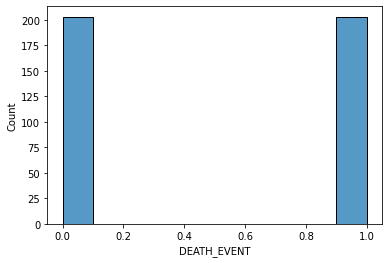

In [16]:
## creating train and validation 
# input
# output

# spliting of data into features and targets

target = df['DEATH_EVENT']
features = df.drop(['time', 'DEATH_EVENT'], axis = 1) 

print(features.head())
# checking the sets

#print('amount of patients in the classification set:',len(features_after_holdout))
#print('amount of death events in holdout:',holdout_target_test.sum(), ',',holdout_target_test.sum()/len(holdout_target_test), '%' )
#print('amount of death events in classification set:',target_after_holdout.sum(), ',',target_after_holdout.sum()/len(target_after_holdout), '%' )



ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_sample(features, target)

sns.histplot(y_ros)

# splitting overbalanced sets into train and test set. with a split of 80/20
features_train, features_test, target_train, target_test = train_test_split(X_ros,
                                                                            y_ros,
                                                                            test_size=0.25,
                                                                            random_state=42)


The preproccessing function is applied to both the train and validation(test set) separately. this function consist of a min max scaler, and of and imputer based on the KNN algortihm (kkn=3).

In [17]:
# apply preprocessing steps to the traing set

features_train_processed = preprocess(features_train)
features_test_processed = preprocess(features_test)

For the classification two model were chosen the Random forest classifier (RFC) and the support vector classifier (SVMC). The two models were optimized using hyper parameter tuning. the Hyperparameter tuning is done using gridsearch function form the scikit learn module. 

For the SVMC the C value which is used for... is varied (1 till 11), an linear kernal and an kernel using rbf is also compared. laslty the gamma parameter is also varied between scale and auto. 

For the RFC the number of estimators is varied, the criterion (...), maximum depth of the tree, the minimal samples neccesary to split in another tree node, and the max features(....).

The gridsearch employs a 5-fold cross validation and uses the area under the curve (ROC-AUC) as a measurment to optimize.

In [18]:
# hyper paramtuning

model_parameters = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [1, 2,3,4,5,6,7,8,9,10, 11],
            'kernel': ['rbf','linear'],
            'gamma':['scale','auto'],
            'random_state':[42],
            'probability': [False]}
        
     },
        'random_forest':{
        'model': RandomForestClassifier(),
        'params' : {
            'criterion':['gini', 'entropy'],
            'n_estimators': [60,100,200],
            'max_depth':[5,10,15],
            'min_samples_split' :[1,2,3,4],
            'max_features':[1,'sqrt','log2'],
            'random_state':[42]
        }
    }    
}

scores = []

for model_name, mp in model_parameters.items():
    clf =  GridSearchCV(mp['model'],
                        mp['params'], 
                        cv=5, 
                        return_train_score=False, 
                        scoring='roc_auc',
                        n_jobs=-1)
    clf.fit(features_train_processed, target_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })            

            # from the scores list the model, best scores and best parameters are saved into
#   the gridsearch  dataframe  

Gridsearch = pd.DataFrame(scores,columns=['model','best_score','best_params'])
Gridsearch 


# based on this data frame the parameters for each model are saved into seperate 
#   dictionaries (these are later unpacked model using ** comand)

print(Gridsearch)
best_params_svm = Gridsearch.loc[0,'best_params']
best_params_rfc = Gridsearch.loc[1,'best_params']
            

           model  best_score  \
0            svm    0.797247   
1  random_forest    0.908430   

                                         best_params  
0  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', '...  
1  {'criterion': 'entropy', 'max_depth': 10, 'max...  


The parameters prevouisly found using the hyperparameter tuning are used for the model. this model is then fitted. The model then predicts outcomes in the validation set

In [19]:
# model fitting and prediction

clf_SVM = svm.SVC(**best_params_svm)
clf_SVM = clf_SVM.fit(features_train_processed, target_train)
test_predict_svm = clf_SVM.predict(features_test_processed)
 
clf_RF = RandomForestClassifier(**best_params_rfc)
clf_RF=clf_RF.fit(features_train_processed, target_train)
test_predict_rf = clf_RF.predict(features_test_processed)

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        51
           1       0.71      0.80      0.75        51

    accuracy                           0.74       102
   macro avg       0.74      0.74      0.73       102
weighted avg       0.74      0.74      0.73       102



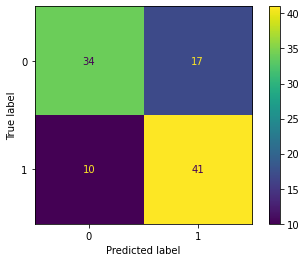

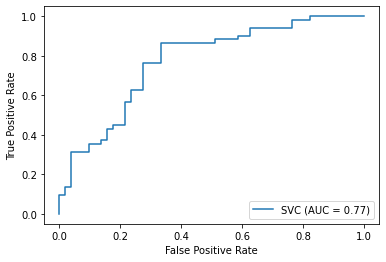

In [20]:
## SVMC
# classification raport
print(classification_report(target_test, test_predict_svm))

# confusion matrix

cm = confusion_matrix(target_test, test_predict_svm)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Roc curve
plot_roc_curve(clf_SVM,features_test_processed, target_test)


              precision    recall  f1-score   support

           0       0.89      0.78      0.83        51
           1       0.81      0.90      0.85        51

    accuracy                           0.84       102
   macro avg       0.85      0.84      0.84       102
weighted avg       0.85      0.84      0.84       102



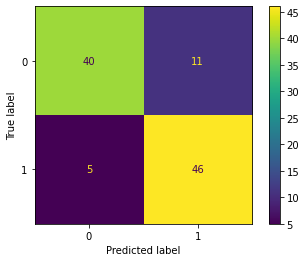

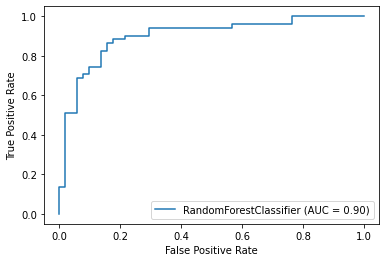

In [21]:
#RFC
#classification raport
print(classification_report(target_test, test_predict_rf))

# confusion matrix
cm = confusion_matrix(target_test, test_predict_rf)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Roc curve
plot_roc_curve(clf_RF,features_test_processed, target_test)